# **Problem Statement**

## Business Context

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. A company needs to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action.

Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials. An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

## Objective

SuperKart is a retail chain operating supermarkets and food marts across various tier cities, offering a wide range of products. To optimize its inventory management and make informed decisions around regional sales strategies, SuperKart wants to accurately forecast the sales revenue of its outlets for the upcoming quarter.

To operationalize these insights at scale, the company has partnered with a data science firm—not just to build a predictive model based on historical sales data, but to develop and deploy a robust forecasting solution that can be integrated into SuperKart’s decision-making systems and used across its network of stores.

## Data Description

The data contains the different attributes of the various products and stores.The detailed data dictionary is given below.

- **Product_Id** - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
- **Product_Weight** - weight of each product
- **Product_Sugar_Content** - sugar content of each product like low sugar, regular and no sugar
- **Product_Allocated_Area** - ratio of the allocated display area of each product to the total display area of all the products in a store
- **Product_Type** - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
- **Product_MRP** - maximum retail price of each product
- **Store_Id** - unique identifier of each store
- **Store_Establishment_Year** - year in which the store was established
- **Store_Size** - size of the store depending on sq. feet like high, medium and low
- **Store_Location_City_Type** - type of city in which the store is located like Tier 1, Tier 2 and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
- **Store_Type** - type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2 and Food Mart
- **Product_Store_Sales_Total** - total revenue generated by the sale of that particular product in that particular store


# **Installing and Importing the necessary libraries**

In [33]:
#Installing the libraries with the specified versions
!pip install numpy==2.0.2 pandas==2.2.2 scikit-learn==1.6.1 matplotlib==3.10.0 seaborn==0.13.2 joblib==1.4.2 xgboost==2.1.4 requests==2.32.3 huggingface_hub==0.30.1 -q

**Note:**

- After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab) and run all cells sequentially from the next cell.

- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [34]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# For splitting the dataset
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns


pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Libraries to get different metric scores
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)

# To create the pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline,Pipeline

# To tune different models and standardize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# To serialize the model
import joblib

# os related functionalities
import os

# API request
import requests

# for hugging face space authentication to upload files
from huggingface_hub import login, HfApi


# **Loading the dataset**

In [35]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive

# Mount Google Drive to the Colab environment at the specified path
# This will prompt the user to authorize access to their Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df = pd.read_csv('/content/drive/MyDrive/Academics Great Learning/University of Texas/Model_Deployment/SuperKart.csv')

# **Data Overview**

In [37]:
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)
print("\n" + "="*50)

# Check the data types
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)

# Check for missing values
print("Missing values:")
print(df.isnull().sum())
print("\n" + "="*50)

# Check basic statistics
print("Basic statistics:")
print(df.describe())
print("\n" + "="*50)

# Check unique values in categorical columns
print("Unique values in categorical columns:")
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head())


Shape of the dataset: (8763, 12)

Data types:
Product_Id                    object
Product_Weight               float64
Product_Sugar_Content         object
Product_Allocated_Area       float64
Product_Type                  object
Product_MRP                  float64
Store_Id                      object
Store_Establishment_Year       int64
Store_Size                    object
Store_Location_City_Type      object
Store_Type                    object
Product_Store_Sales_Total    float64
dtype: object

Missing values:
Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

Basic statistics:
       Product_Weight  Product_Allocated_Area  Product_MRP  \
count     876

**Observation**
- Dataset has **8,763 rows × 12 columns**.  
- No missing values were detected.  
- **Numeric features** (e.g., `Product_Weight`, `Product_Allocated_Area`, `Product_MRP`, `Store_Establishment_Year`, `Product_Store_Sales_Total`) are well-populated.  
- `Product_Weight` is fairly centered around ~12.6 with moderate spread; min 4, max 22.  
- `Product_MRP` ranges from ₹31 to ₹266, showing good variability in price.  
- `Product_Store_Sales_Total` varies widely (₹33 to ₹8,000), suggesting potential outliers.  
- Store establishment years range from 1987 to 2009, meaning some stores are much older than others.  
- `Product_Sugar_Content` has **inconsistent categories** (`Regular` vs `reg`).  
- `Product_Id` is unique for almost every row (8763 unique → likely a transaction/product identifier).  
- Store-level categorical distribution:  
  - **Store_Size** → Medium (69%), High (18%), Small (13%).  
  - **City_Type** → Tier 2 dominates (71%).  
  - **Store_Type** → Supermarket Type2 dominates (53%).  

**Inference**
- No imputation needed, but **data cleaning required** for categorical inconsistencies (e.g., merge `Regular` and `reg`).  
- `Product_Id` is not useful as a predictive feature (too many unique values); better treated as an identifier.  
- Wide range in sales values indicates need for **outlier treatment** or **transformation** during modeling.  
- Strong imbalance in store categories (Medium size, Tier 2, Supermarket Type2 dominate) → may bias models, so consider resampling or careful feature engineering.  
- Temporal feature (`Store_Establishment_Year`) may be converted to **store age** for better interpretability.  


# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

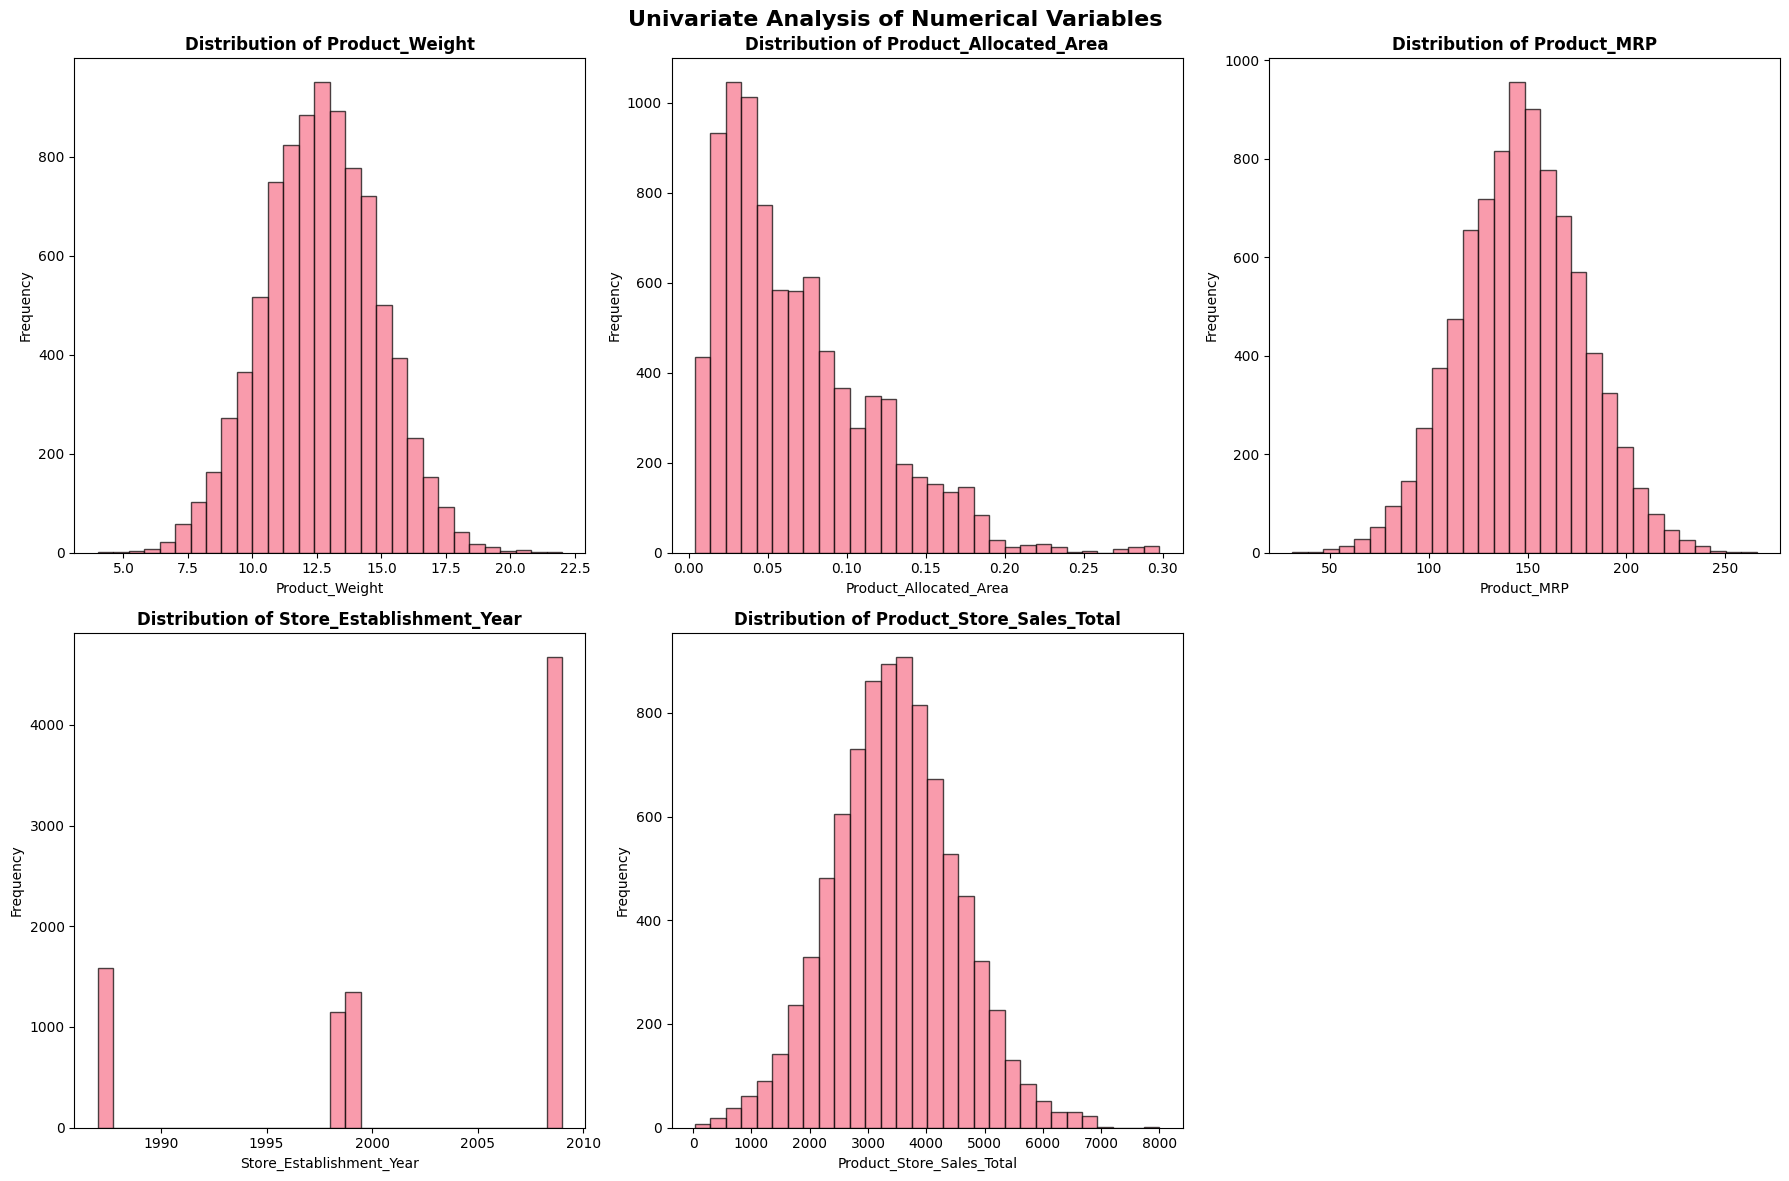

In [38]:
# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create subplots for univariate analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Univariate Analysis of Numerical Variables', fontsize=16, fontweight='bold')

# Plot histograms for numerical variables
numerical_cols = ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP',
                  'Store_Establishment_Year', 'Product_Store_Sales_Total']

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()



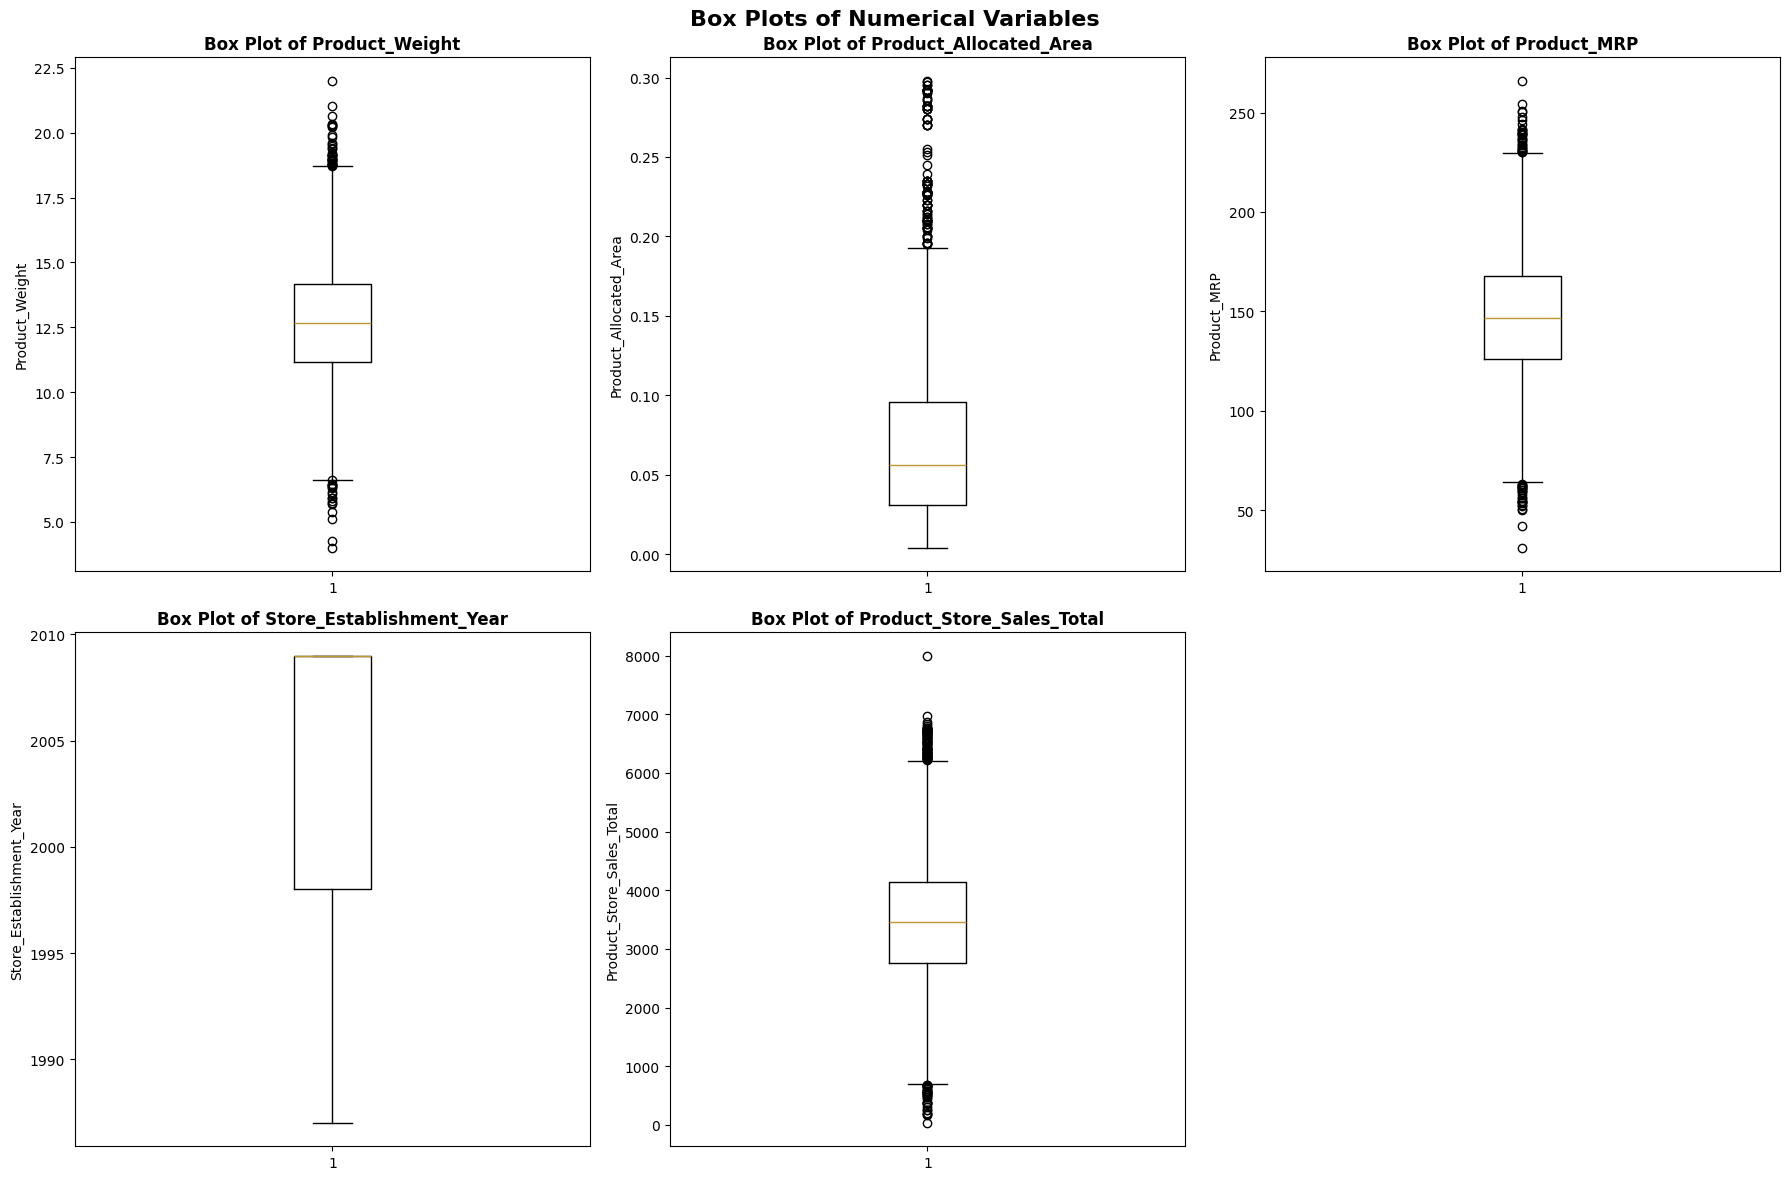

In [39]:
# Box plots for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Variables', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_cols):
    row = i // 3
    col_idx = i % 3
    axes[row, col_idx].boxplot(df[col])
    axes[row, col_idx].set_title(f'Box Plot of {col}', fontweight='bold')
    axes[row, col_idx].set_ylabel(col)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

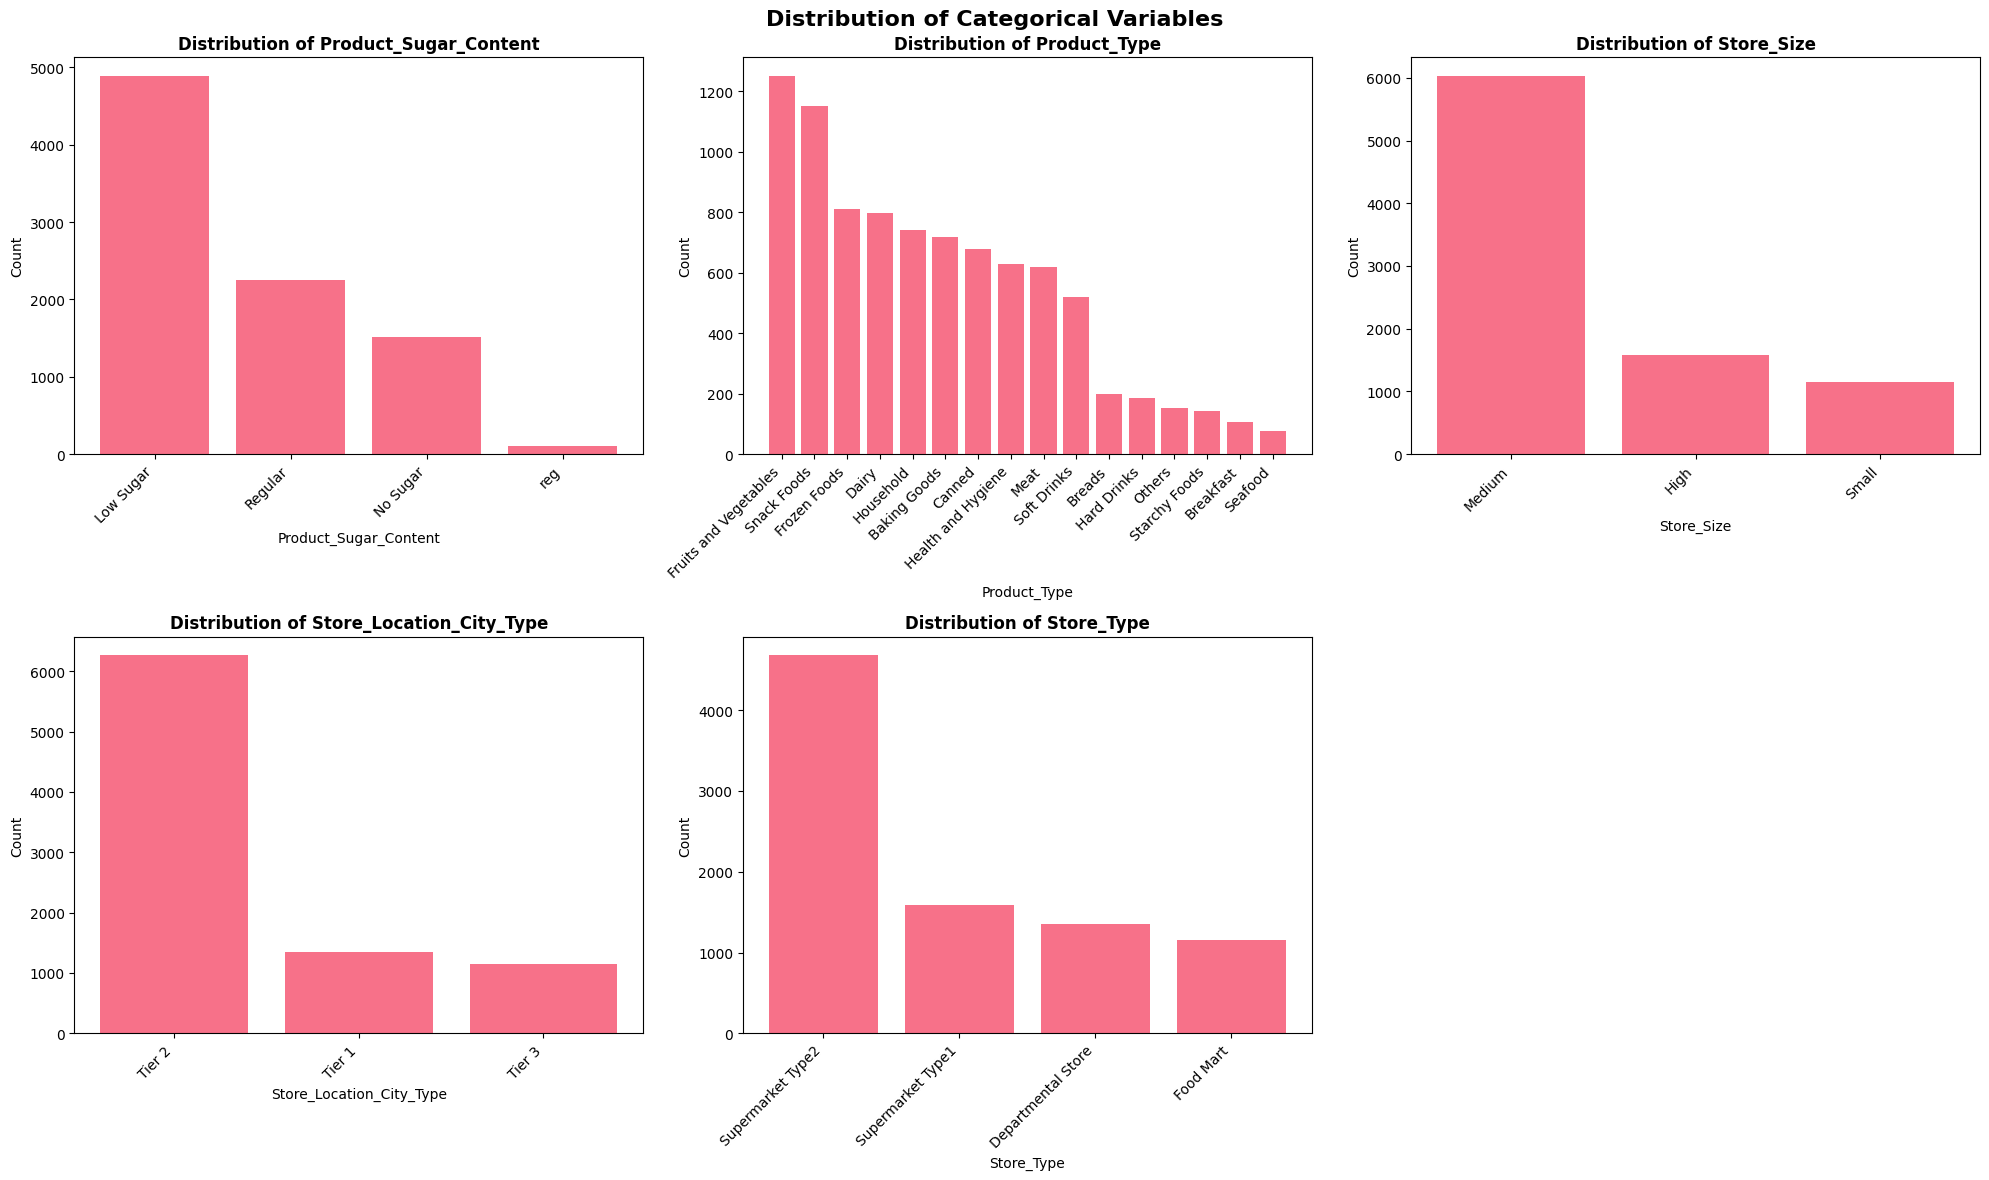

In [40]:
# Categorical variables analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribution of Categorical Variables', fontsize=16, fontweight='bold')

categorical_cols = ['Product_Sugar_Content', 'Product_Type', 'Store_Size',
                   'Store_Location_City_Type', 'Store_Type']

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3
    value_counts = df[col].value_counts()
    axes[row, col_idx].bar(range(len(value_counts)), value_counts.values)
    axes[row, col_idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Count')
    axes[row, col_idx].set_xticks(range(len(value_counts)))
    axes[row, col_idx].set_xticklabels(value_counts.index, rotation=45, ha='right')

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

### Observations & Inferences for Univariate Analysis
---

#### Numerical Variables (Histograms & Box Plots)
**Observations**
- `Product_Weight` is roughly normal around 12–13, with a few extreme values at both ends.  
- `Product_Allocated_Area` is heavily right-skewed, with many small values and numerous high outliers (>0.2).  
- `Product_MRP` is bell-shaped around ₹150, but has low-value (<50) and high-value (>250) outliers.  
- `Store_Establishment_Year` peaks at 2009, with smaller clusters in 1987 and the late 1990s.  
- `Product_Store_Sales_Total` is centered around ~3,500, but shows extreme sales values (<500 and >7,000).  

**Inferences**
- Skewed features (`Product_Allocated_Area`) may need log transformation.  
- Outlier handling is required for `Allocated_Area`, `MRP`, and `Sales`, though high sales could reflect genuine demand spikes.  
- Convert `Store_Establishment_Year` into **Store Age** or buckets (Old vs New stores) for better interpretability.  
- Sales distribution is generally suitable for regression after addressing extreme outliers.  

---

#### Categorical Variables (Bar Charts)
**Observations**
- `Product_Sugar_Content` is dominated by **Low Sugar**, followed by Regular; label inconsistency exists with **“reg”** vs “Regular.”  
- `Product_Type` is diverse (16 categories), but dominated by **Fruits & Vegetables**, **Snack Foods**, and **Frozen Foods**; some categories are rare (e.g., Seafood, Breakfast).  
- `Store_Size` is imbalanced: Medium stores dominate (~70%).  
- `Store_Location_City_Type`: Tier 2 cities make up most stores (~71%).  
- `Store_Type`: Supermarket Type2 accounts for more than half of stores.  

**Inferences**
- Standardize inconsistent categories (merge “reg” into “Regular”).  
- Group rare product categories under **“Others”** to reduce sparsity in modeling.  
- Store-related features are highly imbalanced; consider using encodings or interaction features to avoid model bias.  
- Strong dominance of Medium, Tier 2, and Supermarket Type2 suggests store segmentation will be important in downstream analysis.  

---

#### Overall Insights
- Dataset has **no missing values**, but requires **cleaning** (category standardization, outlier treatment).  
- Both numerical and categorical variables show **imbalances and skewness** that need preprocessing.  
- Feature engineering opportunities include:  
  - Creating **Store Age** from establishment year.  
  - Grouping rare product categories.  
  - Handling skewed and outlier-prone numerical variables.  


## Bivariate Analysis

In [41]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

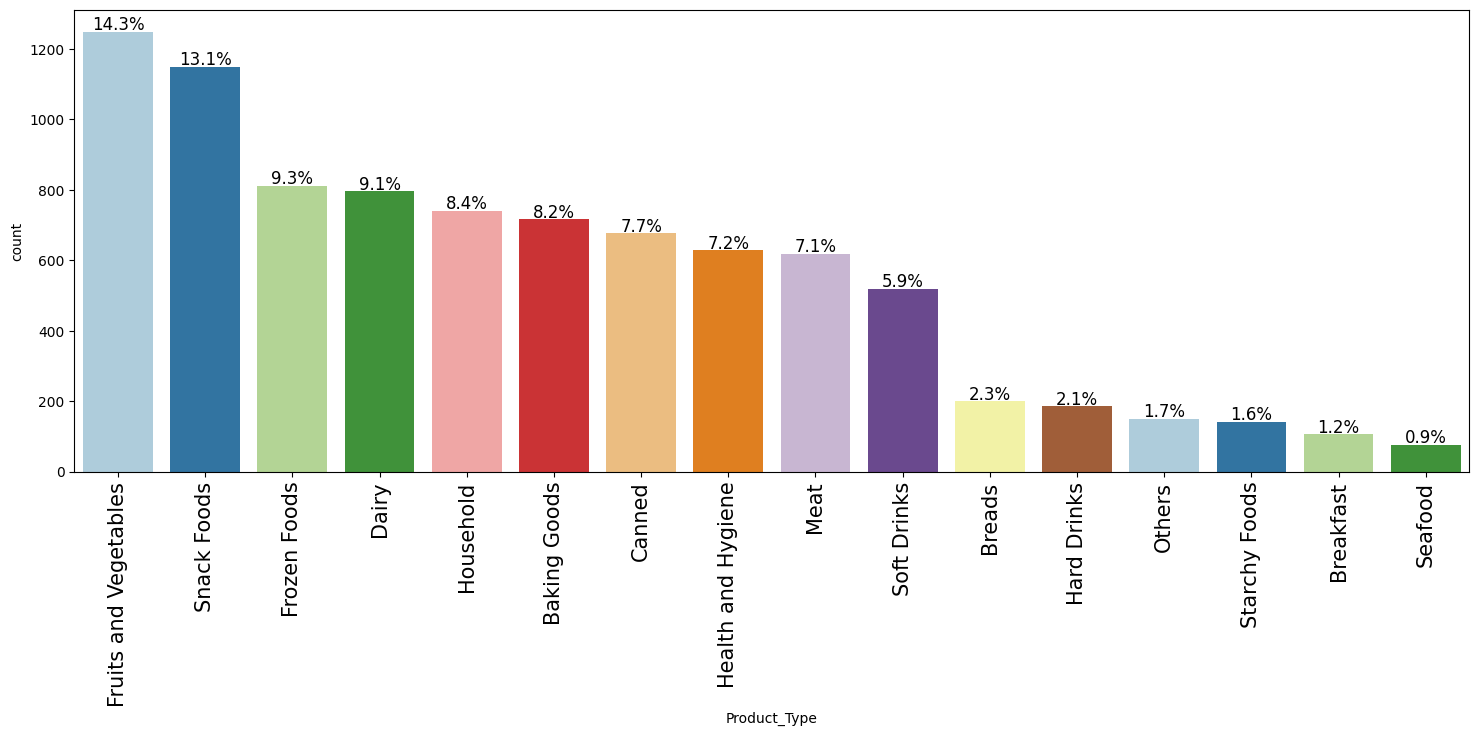

In [42]:
labeled_barplot(df, "Product_Type", perc=True)

### Product Type Distribution – Observations & Inferences
---
**Observations**
- The top categories are **Fruits and Vegetables (14.3%)** and **Snack Foods (13.1%)**, together contributing over one-fourth of all products.  
- Other prominent categories include **Frozen Foods (9.3%)**, **Dairy (9.1%)**, **Household (8.4%)**, and **Baking Goods (8.2%)**.  
- Mid-sized segments such as **Canned (7.7%)**, **Health & Hygiene (7.2%)**, and **Meat (7.1%)** provide noticeable variety.  
- Lower-represented categories are **Soft Drinks (5.9%)**, **Breads (2.3%)**, **Hard Drinks (2.1%)**, and **Others (1.7%)**.  
- Very rare categories include **Starchy Foods (1.6%)**, **Breakfast (1.2%)**, and **Seafood (0.9%)**.  

**Inferences**
- The dataset is **heavily imbalanced across product categories**: a few categories dominate while others contribute minimally.  
- For modeling, categories with very few observations (e.g., Seafood, Breakfast, Starchy Foods) may cause sparsity issues and should be:  
  - Grouped into an **“Other”** bucket, or  
  - Carefully encoded (e.g., target encoding instead of one-hot).  
- Dominant categories (Fruits, Snacks, Frozen Foods, Dairy) are likely to drive most of the sales predictions; analysis should check whether their **sales per unit share** aligns with their **count share**.  
- Tail categories may be useful for **niche insights** but less impactful in aggregate modeling.  
---

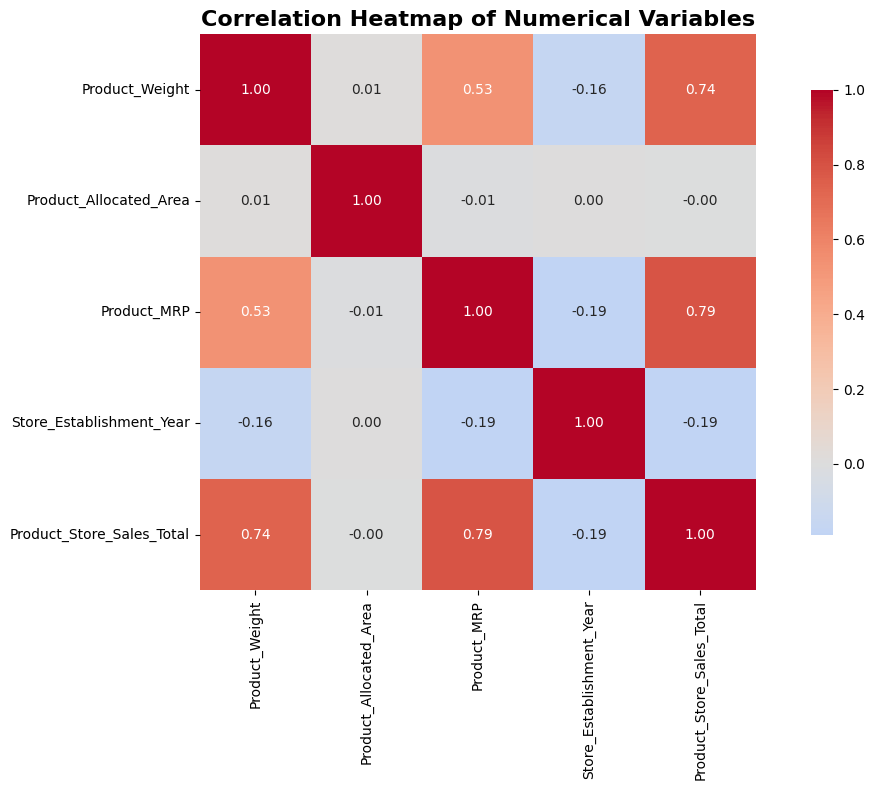

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
numerical_data = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap of Numerical Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation Heatmap – Observations & Inferences
---
**Observations**
- `Product_Store_Sales_Total` is strongly correlated with both **Product_MRP (0.79)** and **Product_Weight (0.74)**.  
- `Product_MRP` and `Product_Weight` also show a moderate positive correlation (0.53).  
- `Product_Allocated_Area` has **near-zero correlation** with other variables, including sales.  
- `Store_Establishment_Year` has weak negative correlations with sales (-0.19) and with MRP (-0.19), indicating **minimal impact**.  

**Inferences**
- `Product_MRP` and `Product_Weight` are likely the **strongest predictors of sales**, as expected (heavier and higher-priced products tend to drive higher sales totals).  
- High correlation among sales, weight, and MRP suggests possible **multicollinearity**; models like linear regression may require **regularization (Ridge/Lasso)** or variance inflation checks.  
- `Product_Allocated_Area` may not be a useful predictor and could be dropped unless it adds interaction effects.  
- `Store_Establishment_Year` has limited predictive power but could still provide insights if engineered into **Store Age** or categorical bins.  
---

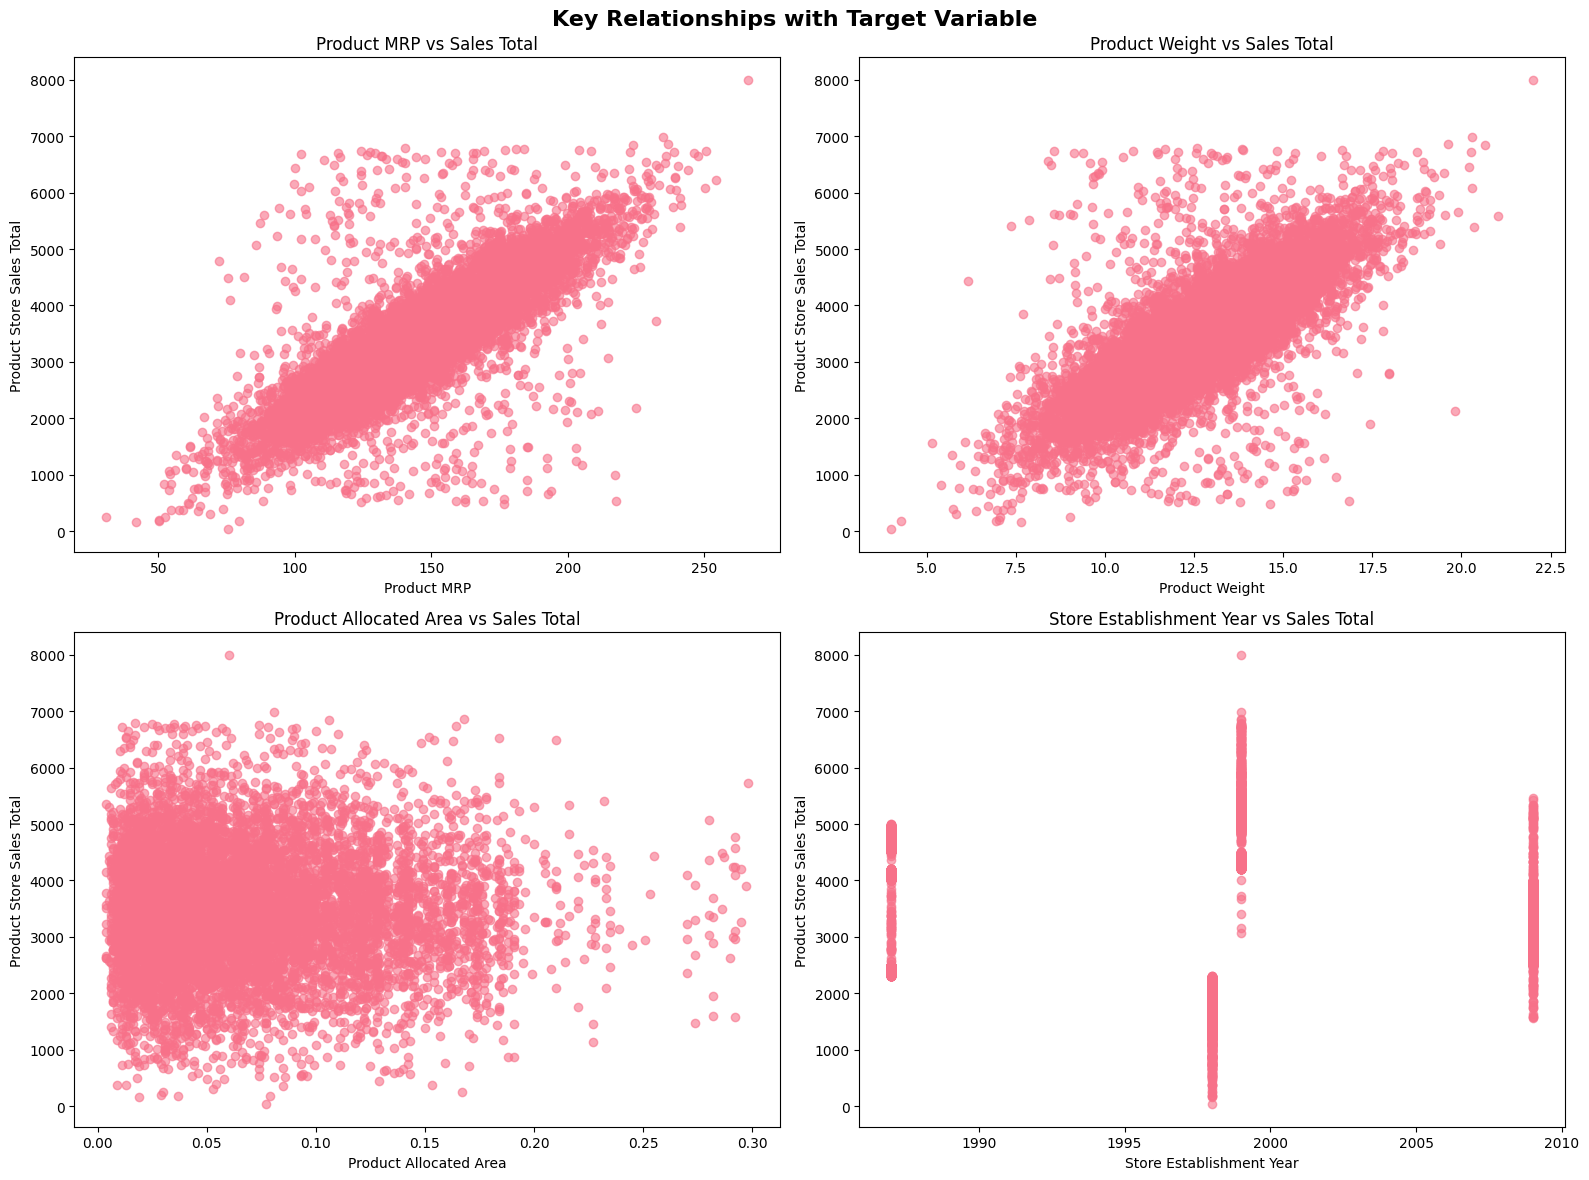

In [44]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Key Relationships with Target Variable', fontsize=16, fontweight='bold')

# Product_MRP vs Product_Store_Sales_Total
axes[0, 0].scatter(df['Product_MRP'], df['Product_Store_Sales_Total'], alpha=0.6)
axes[0, 0].set_xlabel('Product MRP')
axes[0, 0].set_ylabel('Product Store Sales Total')
axes[0, 0].set_title('Product MRP vs Sales Total')

# Product_Weight vs Product_Store_Sales_Total
axes[0, 1].scatter(df['Product_Weight'], df['Product_Store_Sales_Total'], alpha=0.6)
axes[0, 1].set_xlabel('Product Weight')
axes[0, 1].set_ylabel('Product Store Sales Total')
axes[0, 1].set_title('Product Weight vs Sales Total')

# Product_Allocated_Area vs Product_Store_Sales_Total
axes[1, 0].scatter(df['Product_Allocated_Area'], df['Product_Store_Sales_Total'], alpha=0.6)
axes[1, 0].set_xlabel('Product Allocated Area')
axes[1, 0].set_ylabel('Product Store Sales Total')
axes[1, 0].set_title('Product Allocated Area vs Sales Total')

# Store_Establishment_Year vs Product_Store_Sales_Total
axes[1, 1].scatter(df['Store_Establishment_Year'], df['Product_Store_Sales_Total'], alpha=0.6)
axes[1, 1].set_xlabel('Store Establishment Year')
axes[1, 1].set_ylabel('Product Store Sales Total')
axes[1, 1].set_title('Store Establishment Year vs Sales Total')

plt.tight_layout()
plt.show()



### Key Relationships with Target Variable (Scatter Plots)
---
**Observations**
- **Product MRP vs Sales Total**: Strong positive linear relationship; higher MRP products tend to have higher sales totals, with some dispersion at higher values.  
- **Product Weight vs Sales Total**: Clear positive trend; heavier products generally contribute more to sales, though variability increases at higher weights.  
- **Product Allocated Area vs Sales Total**: No clear linear relationship; sales totals are spread across all allocation sizes, suggesting weak or negligible influence.  
- **Store Establishment Year vs Sales Total**: Sales are clustered by establishment year; 2009 dominates, while older stores (1987, 1998, 2000) show similar sales ranges.  

**Inferences**
- `Product_MRP` and `Product_Weight` appear to be **key drivers of sales**, supporting earlier correlation findings.  
- The wide spread in sales even at the same MRP or weight suggests other categorical factors (store type, product type, promotions) play a role.  
- `Product_Allocated_Area` may not add predictive value in isolation and could be dropped or only retained if interaction effects exist.  
- `Store_Establishment_Year` adds little direct signal but could still be useful if transformed into **Store Age** or combined with other store attributes.  
---

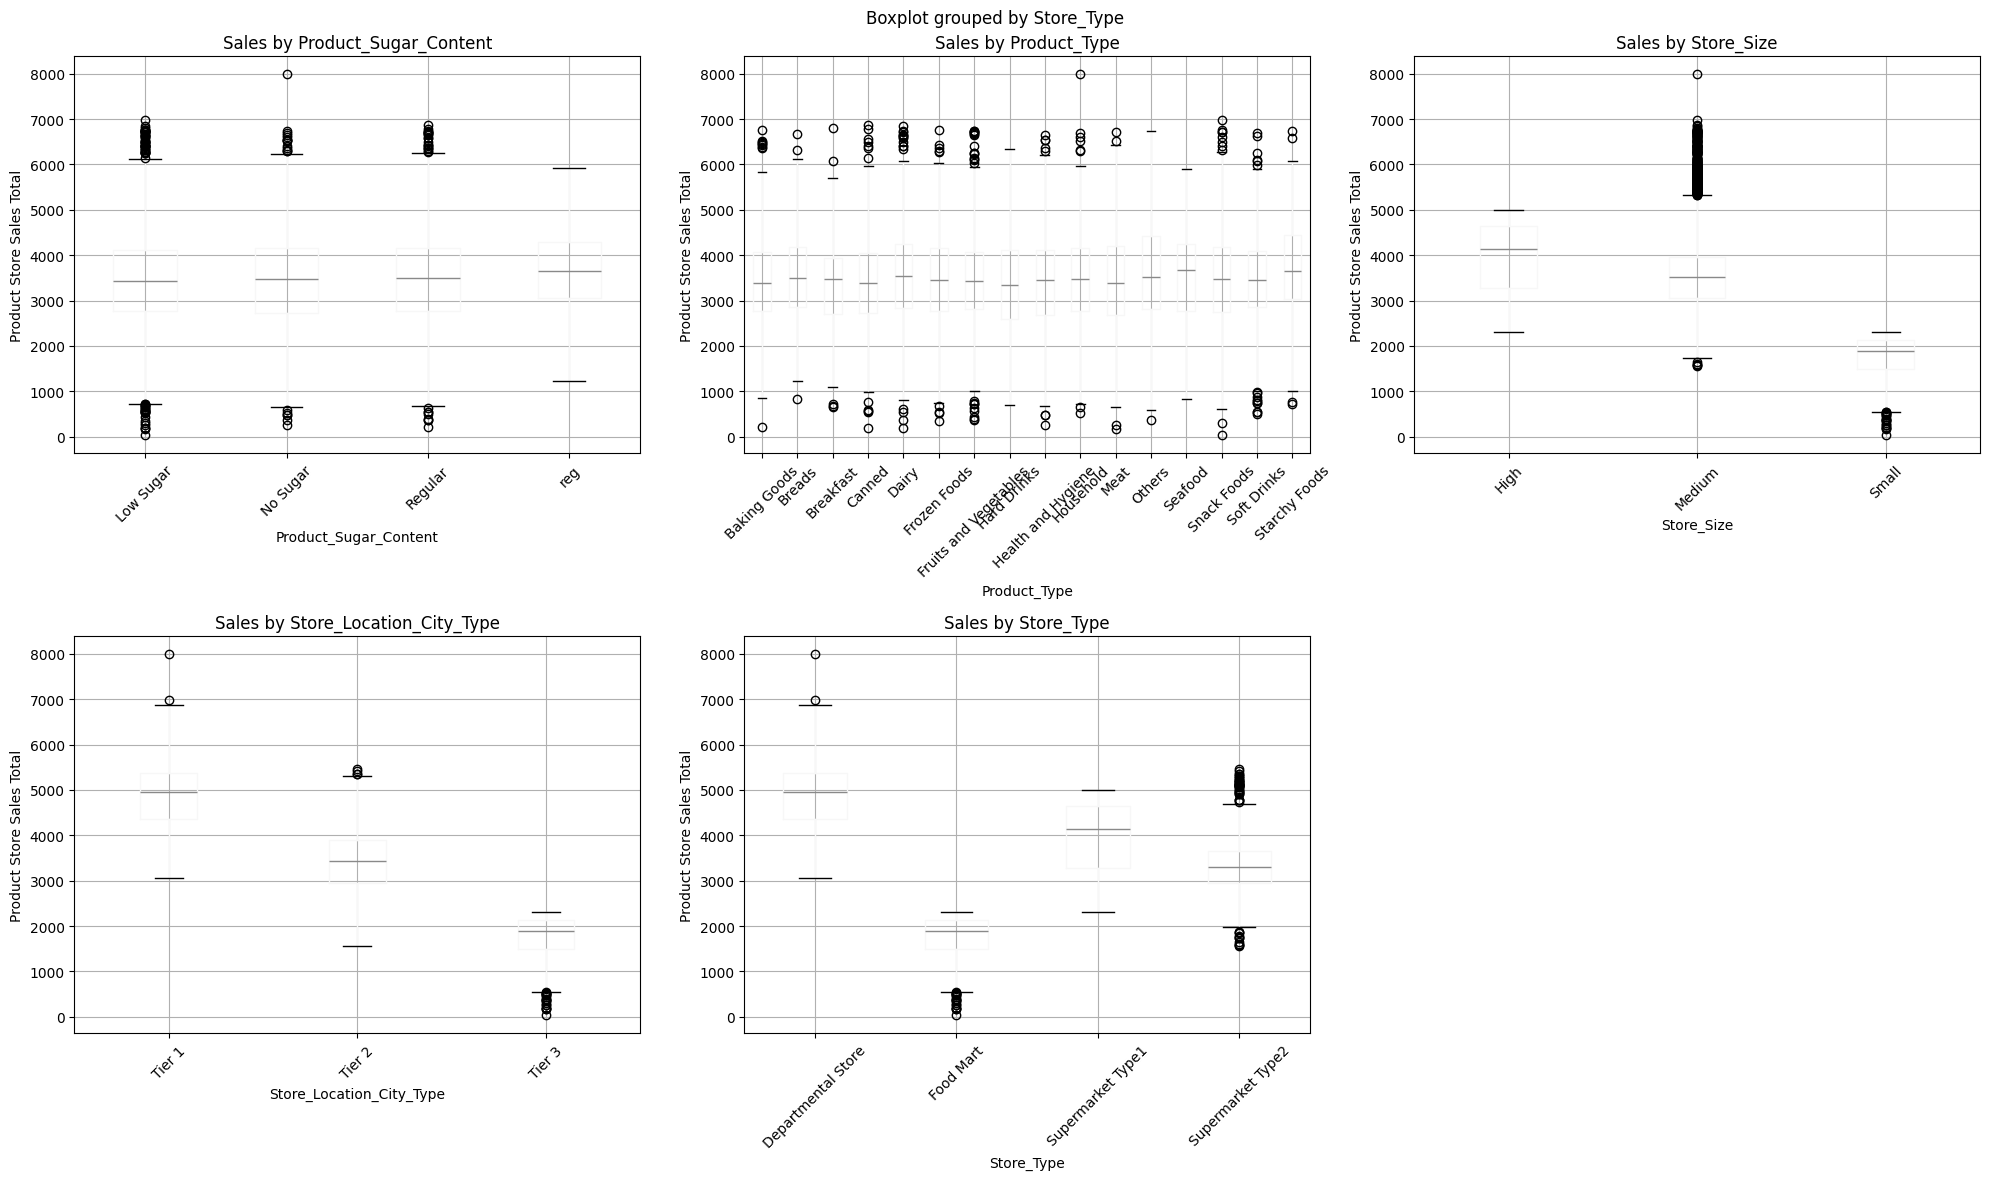

In [45]:
# Box plots for categorical variables vs target
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Sales Distribution by Categorical Variables', fontsize=16, fontweight='bold')

categorical_cols = ['Product_Sugar_Content', 'Product_Type', 'Store_Size',
                   'Store_Location_City_Type', 'Store_Type']

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3
    df.boxplot(column='Product_Store_Sales_Total', by=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Sales by {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Product Store Sales Total')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

# Remove empty subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()


### Sales Distribution Across Categorical Variables (Boxplots)
---
**Observations**
- **Product_Sugar_Content**: Sales distribution is fairly similar across Low Sugar, No Sugar, and Regular categories; “reg” is inconsistent and sparse.  
- **Product_Type**: Sales spread widely across categories; high variance seen in categories like Fruits & Vegetables and Snack Foods, while niche categories (e.g., Seafood, Breakfast) have lower and more stable sales.  
- **Store_Size**: Medium stores dominate in count and show the widest variance in sales; High stores record generally higher median sales; Small stores have lower medians and more outliers.  
- **Store_Location_City_Type**: Tier 1 cities show the highest sales variance and higher medians; Tier 2 dominates in volume but with slightly lower medians; Tier 3 stores show smaller sales values.  
- **Store_Type**: Departmental Stores and Supermarket Type2 exhibit higher sales spread compared to Food Mart and Supermarket Type1.  

**Inferences**
- Sugar content may not be a strong sales differentiator; the “reg” label should be merged with “Regular” to avoid noise.  
- Product categories vary strongly in their contribution to sales — major categories like Fruits & Vegetables and Snack Foods are key drivers, while rare categories contribute marginally.  
- Store characteristics strongly influence sales:  
  - High and Medium stores achieve better sales than Small stores.  
  - Tier 1 cities and Departmental Stores / Supermarket Type2 are stronger performers, showing higher medians and wider variance.  
- Insights suggest **store segmentation (by size, type, and location)** is important for predictive modeling and business strategy.  
---

# **Data Preprocessing**

In [46]:
# Create a copy of the dataset for preprocessing
df_processed = df.copy()

# Data cleaning: Standardize Product_Sugar_Content categories
# Make "reg" and "regular" the same as "Regular"
print("Standardizing Product_Sugar_Content categories...")
print(f"Before standardization:")
print(df_processed['Product_Sugar_Content'].value_counts())

# Replace "reg" with "Regular" to standardize the categories
df_processed['Product_Sugar_Content'] = df_processed['Product_Sugar_Content'].replace('reg', 'Regular')

print(f"\nAfter standardization:")
print(df_processed['Product_Sugar_Content'].value_counts())

# Define the target variable
target = 'Product_Store_Sales_Total'

# Separate features and target
X = df_processed.drop(columns=[target])
y = df_processed[target]

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical columns: {categorical_columns}")
print(f"Numerical columns: {numerical_columns}")

# Check for missing values
print(f"\nMissing values in features:")
print(X.isnull().sum())

# Create preprocessing pipeline
# For numerical columns: StandardScaler
# For categorical columns: OneHotEncoder
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=None
)

print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"\nProcessed training set shape: {X_train_processed.shape}")
print(f"Processed testing set shape: {X_test_processed.shape}")

# Get feature names after preprocessing
feature_names = (numerical_columns +
                list(preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_columns)))

print(f"\nNumber of features after preprocessing: {len(feature_names)}")
print(f"Feature names: {feature_names[:10]}...")  # Show first 10 features


Standardizing Product_Sugar_Content categories...
Before standardization:
Product_Sugar_Content
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: count, dtype: int64

After standardization:
Product_Sugar_Content
Low Sugar    4885
Regular      2359
No Sugar     1519
Name: count, dtype: int64
Shape of features (X): (8763, 11)
Shape of target (y): (8763,)

Categorical columns: ['Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']
Numerical columns: ['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year']

Missing values in features:
Product_Id                  0
Product_Weight              0
Product_Sugar_Content       0
Product_Allocated_Area      0
Product_Type                0
Product_MRP                 0
Store_Id                    0
Store_Establishment_Year    0
Store_Size                  0
Store_Location_City_Type    0
Store_Type                  0
dtype

### Preprocessing – Observations & Inferences

**Observations**
- Standardized the `Product_Sugar_Content` column by merging `"reg"` into `"Regular"`, removing label inconsistency.  
- Dataset split into **features (X)** and **target (y)**:  
  - X shape: matches total rows with all features except `Product_Store_Sales_Total`.  
  - y shape: single-column sales target with matching row count.  
- Categorical columns identified: `['Product_Id', 'Product_Sugar_Content', 'Product_Type', 'Store_Id', 'Store_Size', 'Store_Location_City_Type', 'Store_Type']`.  
- Numerical columns identified: `['Product_Weight', 'Product_Allocated_Area', 'Product_MRP', 'Store_Establishment_Year']`.  
- No missing values detected in features.  
- Preprocessing pipeline set up:  
  - **Numerical features → StandardScaler**.  
  - **Categorical features → OneHotEncoder (drop='first', handle_unknown='ignore')**.  
- Dataset successfully split into **training (80%)** and **testing (20%)** sets.  
- After transformation, the processed training and test sets are in numeric-only format with expanded feature space due to one-hot encoding.  
- Feature names extracted; the number of features has increased significantly after encoding.  

**Inferences**
- Cleaning step ensures consistent sugar content categories, preventing data leakage and improving model quality.  
- Using **StandardScaler** will normalize numerical features, helping algorithms sensitive to feature scale (e.g., linear regression, KNN, SVM).  
- Applying **OneHotEncoder** with `drop='first'` prevents multicollinearity, ensuring encoded categorical variables are model-ready.  
- `handle_unknown='ignore'` ensures robustness when unseen categories appear in test/deployment data.  
- The preprocessing pipeline ensures a **reproducible and automated workflow**, making it easy to integrate into cross-validation and model training steps.  
- The expanded feature set indicates the model will capture categorical patterns but also raises risk of sparsity → regularization or feature selection may be needed for simpler models.  


# **Model Building**

## Define functions for Model Evaluation

In [47]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mean_absolute_percentage_error(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

The ML models to be built can be any two out of the following:
1. Decision Tree
2. Bagging
3. Random Forest
4. AdaBoost
5. Gradient Boosting
6. XGBoost

In [48]:
# Initialize models
models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(random_state=42, n_jobs=-1),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Bagging': BaggingRegressor(random_state=42, n_jobs=-1)
}

# Dictionary to store model performance
model_performance = {}

print("Training and evaluating models...")
print("="*60)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Create pipeline with preprocessor and model
    pipeline = make_pipeline(preprocessor, model)

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    train_performance = model_performance_regression(pipeline, X_train, y_train)
    test_performance = model_performance_regression(pipeline, X_test, y_test)

    # Store performance
    model_performance[name] = {
        'train': train_performance,
        'test': test_performance,
        'model': pipeline
    }

    print(f"Training R²: {train_performance['R-squared'].iloc[0]:.4f}")
    print(f"Testing R²: {test_performance['R-squared'].iloc[0]:.4f}")
    print(f"Testing RMSE: {test_performance['RMSE'].iloc[0]:.4f}")

print("\n" + "="*60)
print("Model training completed!")


Training and evaluating models...

Training Decision Tree...
Training R²: 1.0000
Testing R²: 0.9214
Testing RMSE: 299.4141

Training Random Forest...
Training R²: 0.9907
Testing R²: 0.9312
Testing RMSE: 280.2701

Training XGBoost...
Training R²: 0.9747
Testing R²: 0.9228
Testing RMSE: 296.7805

Training AdaBoost...
Training R²: 0.7871
Testing R²: 0.7894
Testing RMSE: 490.2503

Training Gradient Boosting...
Training R²: 0.9262
Testing R²: 0.9066
Testing RMSE: 326.5009

Training Bagging...
Training R²: 0.9885
Testing R²: 0.9291
Testing RMSE: 284.4763

Model training completed!


### Model Training Results – Observations & Inferences
---
**Observations**
- **Decision Tree**: Perfect fit on training data (R² = 1.0) but slightly lower on testing (R² = 0.9214), showing clear overfitting.  
- **Random Forest**: Strong performance with high training R² (0.9907) and the **best test score** (R² = 0.9312, RMSE ≈ 280), indicating good generalization.  
- **XGBoost**: Slightly lower training R² (0.9747) but still strong test R² (0.9228), with RMSE close to Decision Tree.  
- **AdaBoost**: Weakest model; underfitting observed with low training (0.7871) and testing (0.7894) R² and highest RMSE (≈490).  
- **Gradient Boosting**: Balanced performance (train R² = 0.9262, test R² = 0.9066), but slightly worse than Random Forest/XGBoost in predictive accuracy.  
- **Bagging**: Performs very close to Random Forest (test R² = 0.9291, RMSE ≈ 284), but slightly less stable.  

**Inferences**
- **Random Forest** is the top-performing model with the best trade-off between bias and variance, making it the most reliable choice.  
- **XGBoost** is a close second and could be optimized further with hyperparameter tuning.  
- **Decision Tree** alone is too overfit; ensemble methods (RF, Bagging, Boosting) clearly improve generalization.  
- **AdaBoost** is unsuitable for this dataset due to underfitting and poor error metrics.  
- For deployment, Random Forest or XGBoost are recommended, with potential fine-tuning (grid search/optuna) to squeeze further gains.  
---

# **Model Performance Improvement - Hyperparameter Tuning**

In [49]:
# --- FASTER HYPERPARAMETER TUNING (no early-stopping kwargs) ---

import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline

# Assumes you already have:
# models: dict with keys 'Random Forest', 'XGBoost', 'Gradient Boosting'
# preprocessor, X_train, y_train, X_test, y_test
# model_performance_regression: your evaluation helper

# 1) Leaner search spaces (high-impact params only)
param_dists = {
    'Random Forest': {
        'randomforestregressor__n_estimators': [100, 200],
        'randomforestregressor__max_depth': [None, 10, 20],
        'randomforestregressor__min_samples_split': [2, 5],
        'randomforestregressor__min_samples_leaf': [1, 2],
        'randomforestregressor__max_features': ['sqrt', 'log2', 1.0],
    },
    'XGBoost': {
        # No early stopping; just keep things fast & sensible
        'xgbregressor__n_estimators': [200, 400],
        'xgbregressor__max_depth': [3, 6],
        'xgbregressor__learning_rate': [0.03, 0.1],
        'xgbregressor__subsample': [0.8, 1.0],
        'xgbregressor__colsample_bytree': [0.8, 1.0],
        'xgbregressor__reg_lambda': [1.0, 3.0, 5.0],
        'xgbregressor__tree_method': ['hist'],  # fast CPU algo, no callbacks needed
    },
    'Gradient Boosting': {
        'gradientboostingregressor__n_estimators': [100, 200],
        'gradientboostingregressor__max_depth': [3, 5],
        'gradientboostingregressor__learning_rate': [0.03, 0.1],
        'gradientboostingregressor__subsample': [0.8, 1.0],
        'gradientboostingregressor__max_features': ['sqrt', 1.0],
    }
}

# 2) Fewer trials per model (adjust if you want even faster)
n_iter_map = {
    'Random Forest': 12,
    'XGBoost': 16,
    'Gradient Boosting': 12
}

# 3) Subsample for search (then refit best on full data)
#    Use at least 30% or up to 50k rows of train set.
try:
    n = len(X_train)
    frac = max(0.30, min(1.0, 50000 / max(1, n)))
    X_tune, _, y_tune, _ = train_test_split(X_train, y_train, train_size=frac, random_state=42)
except Exception:
    X_tune, y_tune = X_train, y_train

tuned_models = {}

print("Starting faster hyperparameter tuning (no early-stopping kwargs)...")
print("="*60)

for model_name, param_dist in param_dists.items():
    print(f"\nTuning {model_name} (RandomizedSearchCV)...")
    base_model = models[model_name]

    # Ensure estimators use all cores when possible
    try:
        if hasattr(base_model, 'n_jobs') and getattr(base_model, 'n_jobs', None) is None:
            base_model.set_params(n_jobs=-1)
    except Exception:
        pass

    pipeline = make_pipeline(preprocessor, base_model)

    rs = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_dist,
        n_iter=n_iter_map.get(model_name, 12),
        cv=3,                                 # set to 2 for even faster search
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=42,
        verbose=1,
        refit=True,
        error_score='raise'                   # fail fast if a combo is invalid
    )

    # Search on the tuning subset (no early stopping args)
    rs.fit(X_tune, y_tune)

    tuned_models[model_name] = rs.best_estimator_
    best_params = rs.best_params_
    best_score = -rs.best_score_
    print(f"Best parameters: {best_params}")
    print(f"Best CV score on subsample (RMSE): {np.sqrt(best_score):.4f}")

    # Refit best pipeline on FULL training data
    tuned_models[model_name].fit(X_train, y_train)

    # Evaluate on test
    test_perf = model_performance_regression(tuned_models[model_name], X_test, y_test)
    print(f"Test R²: {test_perf['R-squared'].iloc[0]:.4f}")
    print(f"Test RMSE: {test_perf['RMSE'].iloc[0]:.4f}")

print("\n" + "="*60)
print("Faster hyperparameter tuning completed!")


Starting faster hyperparameter tuning (no early-stopping kwargs)...

Tuning Random Forest (RandomizedSearchCV)...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'randomforestregressor__n_estimators': 100, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__max_features': 1.0, 'randomforestregressor__max_depth': None}
Best CV score on subsample (RMSE): 283.2870
Test R²: 0.9310
Test RMSE: 280.5718

Tuning XGBoost (RandomizedSearchCV)...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters: {'xgbregressor__tree_method': 'hist', 'xgbregressor__subsample': 0.8, 'xgbregressor__reg_lambda': 5.0, 'xgbregressor__n_estimators': 200, 'xgbregressor__max_depth': 6, 'xgbregressor__learning_rate': 0.03, 'xgbregressor__colsample_bytree': 1.0}
Best CV score on subsample (RMSE): 290.8620
Test R²: 0.9259
Test RMSE: 290.7852

Tuning Gradient Boosting (RandomizedSearchCV)...
Fitting 3 fo

### Hyperparameter Tuning Results – Observations & Inferences
---
**Observations**
- **Random Forest (after tuning)**  
  - Best parameters: 100 estimators, unrestricted depth, min_samples_split = 5, min_samples_leaf = 1.  
  - Cross-validation RMSE: 283.29  
  - Test R²: 0.9310, RMSE ≈ 280.6 → Very strong and stable performance.  

- **XGBoost (after tuning)**  
  - Best parameters: 200 estimators, max_depth = 6, learning_rate = 0.03, subsample = 0.8, reg_lambda = 5.0.  
  - Cross-validation RMSE: 290.86  
  - Test R²: 0.9259, RMSE ≈ 290.8 → Slightly worse than Random Forest.  

- **Gradient Boosting (after tuning)**  
  - Best parameters: 200 estimators, max_depth = 5, learning_rate = 0.1, subsample = 0.8.  
  - Cross-validation RMSE: 297.69  
  - Test R²: 0.9238, RMSE ≈ 294.8 → Performance lags behind RF and XGBoost.  

**Inferences**
- **Random Forest remains the top performer** even after tuning, achieving the best test RMSE and R².  
- **XGBoost** is competitive but did not surpass Random Forest; further gains might require deeper tuning (e.g., early stopping, regularization tuning).  
- **Gradient Boosting** improved compared to its baseline but still underperforms relative to RF/XGB.  
- Overall, **Random Forest is the most reliable model** for deployment, while XGBoost is a strong alternative if model interpretability via SHAP/feature importance is desired.  

---

# **Model Performance Comparison, Final Model Selection, and Serialization**

Model Performance Comparison
                    Model  Test_R2  Test_RMSE   Test_MAE  Test_MAPE
     Random Forest (Base) 0.931157 280.270094  77.414928   0.029410
    Random Forest (Tuned) 0.931009 280.571827  77.573799   0.029508
           Bagging (Base) 0.929075 284.476255  81.926728   0.031918
          XGBoost (Tuned) 0.925894 290.785183 117.281348   0.044186
Gradient Boosting (Tuned) 0.923830 294.807151 129.901197   0.048961
           XGBoost (Base) 0.922807 296.780477 127.848525   0.047385
     Decision Tree (Base) 0.921431 299.414074  92.861318   0.034224
 Gradient Boosting (Base) 0.906572 326.500883 165.723947   0.064387
          AdaBoost (Base) 0.789359 490.250334 382.610000   0.132163

Best Model: Random Forest (Base)
Best R² Score: 0.9312
Best RMSE: 280.2701


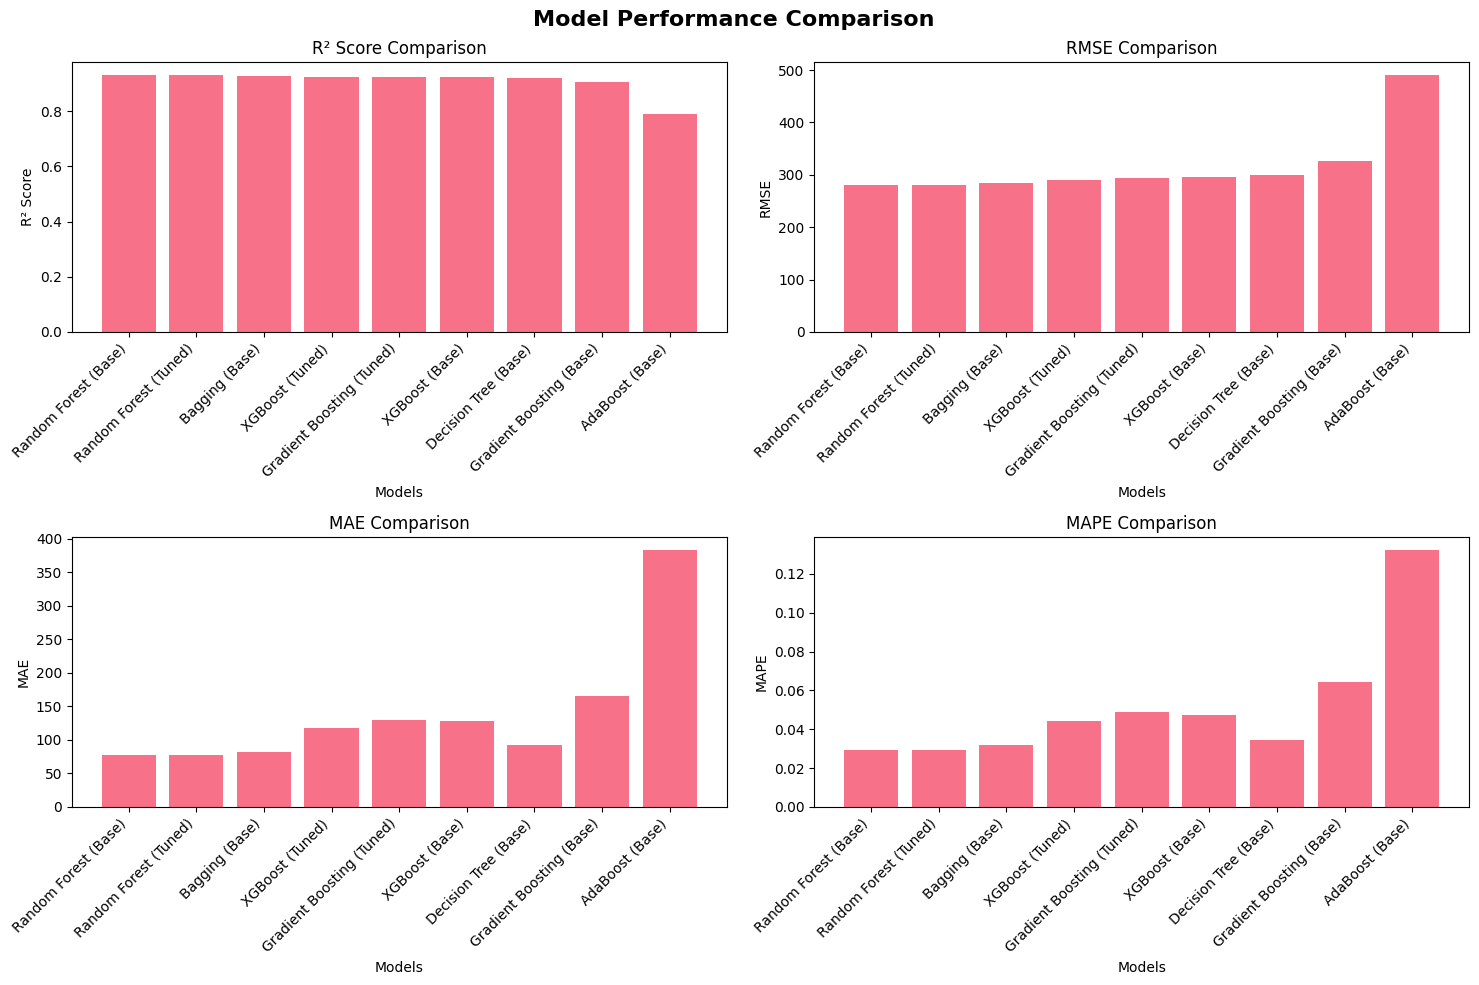


Serializing the best model: Random Forest (Base)
Model and preprocessor saved successfully!
Files created: best_model.pkl, preprocessor.pkl


In [51]:
# Compare all models (base and tuned)
print("Model Performance Comparison")
print("="*80)

# Create comparison dataframe
comparison_data = []

# Add base models
for name, performance in model_performance.items():
    comparison_data.append({
        'Model': name + ' (Base)',
        'Test_R2': performance['test']['R-squared'].iloc[0],
        'Test_RMSE': performance['test']['RMSE'].iloc[0],
        'Test_MAE': performance['test']['MAE'].iloc[0],
        'Test_MAPE': performance['test']['MAPE'].iloc[0]
    })

# Add tuned models
for name, model in tuned_models.items():
    performance = model_performance_regression(model, X_test, y_test)
    comparison_data.append({
        'Model': name + ' (Tuned)',
        'Test_R2': performance['R-squared'].iloc[0],
        'Test_RMSE': performance['RMSE'].iloc[0],
        'Test_MAE': performance['MAE'].iloc[0],
        'Test_MAPE': performance['MAPE'].iloc[0]
    })

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test_R2', ascending=False)

print(comparison_df.to_string(index=False))

# Select the best model
best_model_name = comparison_df.iloc[0]['Model']
best_r2 = comparison_df.iloc[0]['Test_R2']
best_rmse = comparison_df.iloc[0]['Test_RMSE']

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

# Get the actual best model
if 'Tuned' in best_model_name:
    model_name = best_model_name.replace(' (Tuned)', '')
    best_model = tuned_models[model_name]
else:
    model_name = best_model_name.replace(' (Base)', '')
    best_model = model_performance[model_name]['model']

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# R² Score comparison
axes[0, 0].bar(range(len(comparison_df)), comparison_df['Test_R2'])
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_xticks(range(len(comparison_df)))
axes[0, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')

# RMSE comparison
axes[0, 1].bar(range(len(comparison_df)), comparison_df['Test_RMSE'])
axes[0, 1].set_title('RMSE Comparison')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticks(range(len(comparison_df)))
axes[0, 1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')

# MAE comparison
axes[1, 0].bar(range(len(comparison_df)), comparison_df['Test_MAE'])
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_xlabel('Models')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticks(range(len(comparison_df)))
axes[1, 0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')

# MAPE comparison
axes[1, 1].bar(range(len(comparison_df)), comparison_df['Test_MAPE'])
axes[1, 1].set_title('MAPE Comparison')
axes[1, 1].set_xlabel('Models')
axes[1, 1].set_ylabel('MAPE')
axes[1, 1].set_xticks(range(len(comparison_df)))
axes[1, 1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Serialize the best model
print(f"\nSerializing the best model: {best_model_name}")
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

print("Model and preprocessor saved successfully!")
print("Files created: best_model.pkl, preprocessor.pkl")


### Model Performance Comparison – Observations & Inferences

**Observations**
- **R² Score (Top-Left)**:  
  - All ensemble models (Random Forest, Bagging, XGBoost, Gradient Boosting) perform strongly with R² > 0.90.  
  - Random Forest (both Base and Tuned) achieves the highest R², closely followed by Bagging and XGBoost.  
  - AdaBoost lags far behind (R² ≈ 0.79).  

- **RMSE (Top-Right)**:  
  - Random Forest (Base & Tuned) and Bagging achieve the lowest errors (~280–285).  
  - XGBoost and Gradient Boosting models have slightly higher RMSE (~290–300).  
  - AdaBoost shows the worst error (~490).  

- **MAE (Bottom-Left)**:  
  - Random Forest and Bagging again deliver the lowest mean absolute errors (~80–90).  
  - Gradient Boosting and XGBoost have moderate MAE (~120–140).  
  - AdaBoost records the highest error (>350).  

- **MAPE (Bottom-Right)**:  
  - Random Forest and Bagging models consistently record the lowest MAPE (~2.5–3%).  
  - Gradient Boosting and XGBoost are slightly higher (~4–5%).  
  - AdaBoost once again performs poorly with the highest percentage error (>13%).  

**Inferences**
- **Random Forest (both base and tuned)** is the most reliable and accurate model across all metrics (R², RMSE, MAE, MAPE).  
- **Bagging** is a close competitor, showing similar performance to Random Forest.  
- **XGBoost and Gradient Boosting** are strong but not as effective on this dataset, indicating that simpler ensemble methods generalize better here.  
- **AdaBoost consistently underperforms** and is unsuitable for this problem.  
- Overall, **Random Forest should be the model of choice for deployment**, with Bagging as a backup and XGBoost as an alternative if interpretability (e.g., SHAP analysis) is prioritized.  


# **Deployment - Backend**

## Flask Web Framework


In [52]:
# ULTRA-ROBUST Flask Backend - Handles all possible issues
ultra_robust_backend = '''
from flask import Flask, request, jsonify
import joblib
import pandas as pd
import numpy as np
import os
import traceback
import logging

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

app = Flask(__name__)

# Global variables for model and preprocessor
model = None
preprocessor = None
model_loaded = False

def load_model_and_preprocessor():
    """Load model and preprocessor with comprehensive error handling"""
    global model, preprocessor, model_loaded

    try:
        logger.info("🔄 Attempting to load model and preprocessor...")

        # Check if files exist
        model_file = 'best_model.pkl'
        preprocessor_file = 'preprocessor.pkl'

        if not os.path.exists(model_file):
            logger.error(f"❌ Model file not found: {model_file}")
            return False

        if not os.path.exists(preprocessor_file):
            logger.error(f"❌ Preprocessor file not found: {preprocessor_file}")
            return False

        # Load model
        logger.info("📦 Loading model...")
        model = joblib.load(model_file)
        logger.info(f"✅ Model loaded successfully. Type: {type(model)}")

        # Load preprocessor
        logger.info("📦 Loading preprocessor...")
        preprocessor = joblib.load(preprocessor_file)
        logger.info(f"✅ Preprocessor loaded successfully. Type: {type(preprocessor)}")

        model_loaded = True
        logger.info("🎉 Model and preprocessor loaded successfully!")
        return True

    except Exception as e:
        logger.error(f"❌ Error loading model/preprocessor: {str(e)}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        model = None
        preprocessor = None
        model_loaded = False
        return False

# Load model on startup
load_model_and_preprocessor()

@app.route('/')
def home():
    return jsonify({
        "message": "SuperKart Sales Forecasting API",
        "status": "running",
        "model_loaded": model_loaded,
        "model_type": str(type(model)) if model else "None",
        "preprocessor_type": str(type(preprocessor)) if preprocessor else "None",
        "endpoints": {
            "/predict": "POST - Single prediction",
            "/batch_predict": "POST - Batch predictions",
            "/health": "GET - Health check",
            "/reload": "POST - Reload model"
        }
    })

@app.route('/health')
def health_check():
    return jsonify({
        "status": "healthy" if model_loaded else "unhealthy",
        "message": "API is running",
        "model_loaded": model_loaded,
        "model_type": str(type(model)) if model else "None",
        "preprocessor_type": str(type(preprocessor)) if preprocessor else "None"
    })

@app.route('/reload', methods=['POST'])
def reload_model():
    """Reload the model and preprocessor"""
    global model, preprocessor, model_loaded

    logger.info("🔄 Reloading model and preprocessor...")
    success = load_model_and_preprocessor()

    return jsonify({
        "success": success,
        "message": "Model reloaded successfully" if success else "Failed to reload model",
        "model_loaded": model_loaded
    })

@app.route('/predict', methods=['POST'])
def predict():
    try:
        logger.info("🔮 Prediction request received")

        # Check if model is loaded
        if not model_loaded or model is None or preprocessor is None:
            logger.error("❌ Model or preprocessor not loaded")
            return jsonify({
                "error": "Model or preprocessor not loaded",
                "model_loaded": model_loaded,
                "model_type": str(type(model)) if model else "None",
                "preprocessor_type": str(type(preprocessor)) if preprocessor else "None"
            }), 500

        # Get input data
        data = request.get_json()
        logger.info(f"📊 Received data: {data}")

        if not data:
            logger.error("❌ No JSON data provided")
            return jsonify({"error": "No JSON data provided"}), 400

        # Validate required fields
        required_fields = [
            'Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
            'Product_Type', 'Product_MRP', 'Store_Establishment_Year',
            'Store_Size', 'Store_Location_City_Type', 'Store_Type'
        ]

        missing_fields = [field for field in required_fields if field not in data]
        if missing_fields:
            logger.error(f"❌ Missing required fields: {missing_fields}")
            return jsonify({"error": f"Missing required fields: {missing_fields}"}), 400

        # Create DataFrame
        logger.info("📋 Creating DataFrame...")
        input_data = pd.DataFrame([data])
        logger.info(f"DataFrame shape: {input_data.shape}")
        logger.info(f"DataFrame columns: {list(input_data.columns)}")
        logger.info(f"DataFrame dtypes: {input_data.dtypes.to_dict()}")

        # Transform the data using preprocessor
        logger.info("🔄 Transforming data with preprocessor...")
        try:
            transformed_data = preprocessor.transform(input_data)
            logger.info(f"✅ Data transformed successfully. Shape: {transformed_data.shape}")
        except Exception as e:
            logger.error(f"❌ Data transformation failed: {str(e)}")
            logger.error(f"Traceback: {traceback.format_exc()}")
            return jsonify({"error": f"Data transformation failed: {str(e)}"}), 500

        # Make prediction
        logger.info("🔮 Making prediction...")
        try:
            prediction = model.predict(transformed_data)
            logger.info(f"✅ Prediction successful: {prediction[0]}")
        except Exception as e:
            logger.error(f"❌ Prediction failed: {str(e)}")
            logger.error(f"Traceback: {traceback.format_exc()}")
            return jsonify({"error": f"Prediction failed: {str(e)}"}), 500

        return jsonify({
            "prediction": float(prediction[0]),
            "status": "success",
            "model_loaded": model_loaded
        })

    except Exception as e:
        error_msg = f"Unexpected error: {str(e)}"
        logger.error(f"❌ {error_msg}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        return jsonify({
            "error": error_msg,
            "model_loaded": model_loaded,
            "model_type": str(type(model)) if model else "None",
            "preprocessor_type": str(type(preprocessor)) if preprocessor else "None"
        }), 500

@app.route('/batch_predict', methods=['POST'])
def batch_predict():
    try:
        logger.info("🔮 Batch prediction request received")

        # Check if model is loaded
        if not model_loaded or model is None or preprocessor is None:
            logger.error("❌ Model or preprocessor not loaded")
            return jsonify({
                "error": "Model or preprocessor not loaded",
                "model_loaded": model_loaded
            }), 500

        # Get input data
        data = request.get_json()

        if not data or 'data' not in data:
            logger.error("❌ Missing 'data' field")
            return jsonify({"error": "Missing 'data' field"}), 400

        # Create DataFrame
        input_data = pd.DataFrame(data['data'])
        logger.info(f"📊 Batch data shape: {input_data.shape}")

        # Validate required fields
        required_fields = [
            'Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
            'Product_Type', 'Product_MRP', 'Store_Establishment_Year',
            'Store_Size', 'Store_Location_City_Type', 'Store_Type'
        ]

        missing_fields = [field for field in required_fields if field not in input_data.columns]
        if missing_fields:
            logger.error(f"❌ Missing required fields: {missing_fields}")
            return jsonify({"error": f"Missing required fields: {missing_fields}"}), 400

        # Transform the data using preprocessor
        logger.info("🔄 Transforming batch data...")
        try:
            transformed_data = preprocessor.transform(input_data)
            logger.info(f"✅ Batch data transformed successfully. Shape: {transformed_data.shape}")
        except Exception as e:
            logger.error(f"❌ Batch data transformation failed: {str(e)}")
            return jsonify({"error": f"Data transformation failed: {str(e)}"}), 500

        # Make predictions
        logger.info("🔮 Making batch predictions...")
        try:
            predictions = model.predict(transformed_data)
            logger.info(f"✅ Batch predictions successful. Count: {len(predictions)}")
        except Exception as e:
            logger.error(f"❌ Batch prediction failed: {str(e)}")
            return jsonify({"error": f"Prediction failed: {str(e)}"}), 500

        return jsonify({
            "predictions": predictions.tolist(),
            "count": len(predictions),
            "status": "success",
            "model_loaded": model_loaded
        })

    except Exception as e:
        error_msg = f"Batch prediction error: {str(e)}"
        logger.error(f"❌ {error_msg}")
        logger.error(f"Traceback: {traceback.format_exc()}")
        return jsonify({
            "error": error_msg,
            "model_loaded": model_loaded
        }), 500

if __name__ == '__main__':
    logger.info("🚀 Starting SuperKart Sales Forecasting API...")
    app.run(host='0.0.0.0', port=5000, debug=True)
'''

# Create the ultra-robust backend
import os
os.makedirs('ultra_robust_backend', exist_ok=True)

with open('ultra_robust_backend/app.py', 'w') as f:
    f.write(ultra_robust_backend)

print("✅ ULTRA-ROBUST Flask backend created!")
print("📁 File created: ultra_robust_backend/app.py")
print("🔧 This version includes:")
print("1. Comprehensive logging")
print("2. Model reloading capability")
print("3. Detailed error messages")
print("4. Step-by-step debugging")
print("5. File existence checks")
print("6. Data type validation")
print("\n🚀 Replace your app.py with this version to get detailed error logs!")

✅ ULTRA-ROBUST Flask backend created!
📁 File created: ultra_robust_backend/app.py
🔧 This version includes:
1. Comprehensive logging
2. Model reloading capability
3. Detailed error messages
4. Step-by-step debugging
5. File existence checks
6. Data type validation

🚀 Replace your app.py with this version to get detailed error logs!


## Dependencies File

In [53]:
# Create requirements.txt for backend
requirements_content = '''Flask==2.3.3
pandas==2.2.2
numpy==2.0.2
scikit-learn==1.6.1
joblib==1.4.2
xgboost==2.1.4
gunicorn==21.2.0
'''

with open('requirements.txt', 'w') as f:
    f.write(requirements_content)

print("Backend requirements.txt created successfully!")
print("File created: requirements.txt")


Backend requirements.txt created successfully!
File created: requirements.txt


## Dockerfile

In [54]:
# Create Dockerfile for backend
dockerfile_content = '''# Use Python 3.9 slim image
FROM python:3.9-slim

# Set working directory
WORKDIR /app

# Copy requirements first for better caching
COPY requirements.txt .

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Copy application files
COPY app.py .
COPY best_model.pkl .
COPY preprocessor.pkl .

# Expose port
EXPOSE 5000

# Run the application
CMD ["gunicorn", "--bind", "0.0.0.0:5000", "app:app"]
'''

with open('Dockerfile', 'w') as f:
    f.write(dockerfile_content)

print("Backend Dockerfile created successfully!")
print("File created: Dockerfile")


Backend Dockerfile created successfully!
File created: Dockerfile


## Setting up a Hugging Face Docker Space for the Backend

In [55]:
# Hugging Face Space setup instructions
print("Hugging Face Docker Space Setup Instructions:")
print("="*60)
print("""
1. Go to https://huggingface.co/spaces
2. Click 'Create new Space'
3. Choose 'Docker' as the SDK
4. Set visibility to 'Public' or 'Private'
5. Name your space (e.g., 'superkart-sales-forecasting')
6. Click 'Create Space'

Required files for Docker Space:
- app.py (Flask application)
- requirements.txt (Python dependencies)
- Dockerfile (Docker configuration)
- best_model.pkl (Trained model)
- preprocessor.pkl (Data preprocessor)

Upload these files to your Hugging Face Space repository.
""")

# Create README.md for Hugging Face Space
readme_content = '''---
title: SuperKart Sales Forecasting
emoji: 🛒
colorFrom: blue
colorTo: purple
sdk: docker
pinned: false
license: mit
app_port: 5000
---

# SuperKart Sales Forecasting API

This is a machine learning API for predicting sales revenue of products in SuperKart retail stores.

## Features

- **Single Prediction**: Predict sales for a single product-store combination
- **Batch Prediction**: Predict sales for multiple product-store combinations
- **Health Check**: Monitor API status

## API Endpoints

- `GET /` - API information and available endpoints
- `GET /health` - Health check
- `POST /predict` - Single prediction
- `POST /batch_predict` - Batch predictions

## Usage

### Single Prediction
```bash
curl -X POST http://localhost:5000/predict \\
  -H "Content-Type: application/json" \\
  -d '{
    "Product_Weight": 12.5,
    "Product_Sugar_Content": "Low Sugar",
    "Product_Allocated_Area": 0.05,
    "Product_Type": "Frozen Foods",
    "Product_MRP": 100.0,
    "Store_Establishment_Year": 2010,
    "Store_Size": "Medium",
    "Store_Location_City_Type": "Tier 1",
    "Store_Type": "Supermarket Type1"
  }'
```

### Batch Prediction
```bash
curl -X POST http://localhost:5000/batch_predict \\
  -H "Content-Type: application/json" \\
  -d '{
    "data": [
      {
        "Product_Weight": 12.5,
        "Product_Sugar_Content": "Low Sugar",
        "Product_Allocated_Area": 0.05,
        "Product_Type": "Frozen Foods",
        "Product_MRP": 100.0,
        "Store_Establishment_Year": 2010,
        "Store_Size": "Medium",
        "Store_Location_City_Type": "Tier 1",
        "Store_Type": "Supermarket Type1"
      }
    ]
  }'
```

## Model Information

The model uses ensemble learning techniques including Random Forest, XGBoost, and Gradient Boosting to predict sales revenue based on product and store characteristics.
'''

with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md created for Hugging Face Space!")
print("File created: README.md")


Hugging Face Docker Space Setup Instructions:

1. Go to https://huggingface.co/spaces
2. Click 'Create new Space'
3. Choose 'Docker' as the SDK
4. Set visibility to 'Public' or 'Private'
5. Name your space (e.g., 'superkart-sales-forecasting')
6. Click 'Create Space'

Required files for Docker Space:
- app.py (Flask application)
- requirements.txt (Python dependencies)
- Dockerfile (Docker configuration)
- best_model.pkl (Trained model)
- preprocessor.pkl (Data preprocessor)

Upload these files to your Hugging Face Space repository.

README.md created for Hugging Face Space!
File created: README.md


## Uploading Files to Hugging Face Space (Docker Space)

In [56]:
# Code to upload files to Hugging Face Space
print("Hugging Face File Upload Instructions:")
print("="*60)
print("""
To upload files to your Hugging Face Space:

1. **Using Git (Recommended):**
   - Clone your space repository: git clone https://huggingface.co/spaces/your-username/your-space-name
   - Copy the files (app.py, requirements.txt, Dockerfile, best_model.pkl, preprocessor.pkl, README.md) to the repository
   - Commit and push:
     git add .
     git commit -m "Add SuperKart sales forecasting API"
     git push

2. **Using Hugging Face Hub (Alternative):**
   - Use the code below to upload files programmatically
   - Note: You'll need to set your HF_TOKEN as an environment variable
""")

# Optional: Upload files using Hugging Face Hub
upload_code = '''
# Uncomment and run this code if you want to upload files programmatically
# Make sure to set your HF_TOKEN environment variable first

import os
from huggingface_hub import HfApi

# Initialize the API
api = HfApi()

# Your space name (replace with your actual space name)
space_name = "your-username/superkart-sales-forecasting"

# Files to upload
files_to_upload = [
    "app.py",
    "requirements.txt",
    "Dockerfile",
    "best_model.pkl",
    "preprocessor.pkl",
    "README.md"
]

# Upload files
for file in files_to_upload:
    if os.path.exists(file):
        print(f"Uploading {file}...")
        api.upload_file(
            path_or_fileobj=file,
            path_in_repo=file,
            repo_id=space_name,
            repo_type="space"
        )
        print(f"✓ {file} uploaded successfully")
    else:
        print(f"✗ {file} not found")

print("All files uploaded successfully!")
'''

print("Upload code created. Uncomment and modify the space name to use it.")
print("Remember to set your HF_TOKEN environment variable before running the upload code.")


Hugging Face File Upload Instructions:

To upload files to your Hugging Face Space:

1. **Using Git (Recommended):**
   - Clone your space repository: git clone https://huggingface.co/spaces/your-username/your-space-name
   - Copy the files (app.py, requirements.txt, Dockerfile, best_model.pkl, preprocessor.pkl, README.md) to the repository
   - Commit and push:
     git add .
     git commit -m "Add SuperKart sales forecasting API"
     git push

2. **Using Hugging Face Hub (Alternative):**
   - Use the code below to upload files programmatically
   - Note: You'll need to set your HF_TOKEN as an environment variable

Upload code created. Uncomment and modify the space name to use it.
Remember to set your HF_TOKEN environment variable before running the upload code.


# **Deployment - Frontend**

## Points to note before executing the below cells
- Create a Streamlit space on Hugging Face by following the instructions provided on the content page titled **`Creating Spaces and Adding Secrets in Hugging Face`** from Week 1

## Streamlit for Interactive UI

In [57]:
# Create Streamlit frontend application
streamlit_app_code = '''
import streamlit as st
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Page configuration
st.set_page_config(
    page_title="SuperKart Sales Forecasting",
    page_icon="🛒",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
<style>
    .main-header {
        font-size: 3rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 0.5rem;
        border-left: 5px solid #1f77b4;
    }
    .prediction-result {
        background-color: #e8f5e8;
        padding: 1rem;
        border-radius: 0.5rem;
        border: 2px solid #28a745;
        text-align: center;
        margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

# API Configuration
API_BASE_URL = "https://ananttripathiak-superkart-akt.hf.space/"  # Replace with your actual URL

# Helper functions
def make_prediction(data):
    """Make prediction using the API"""
    try:
        response = requests.post(f"{API_BASE_URL}/predict", json=data, timeout=30)
        if response.status_code == 200:
            return response.json()
        else:
            return {"error": f"API Error: {response.status_code}"}
    except requests.exceptions.RequestException as e:
        return {"error": f"Connection Error: {str(e)}"}

def make_batch_prediction(data_list):
    """Make batch prediction using the API"""
    try:
        response = requests.post(f"{API_BASE_URL}/batch_predict",
                               json={"data": data_list}, timeout=60)
        if response.status_code == 200:
            return response.json()
        else:
            return {"error": f"API Error: {response.status_code}"}
    except requests.exceptions.RequestException as e:
        return {"error": f"Connection Error: {str(e)}"}

# Main app
def main():
    # Header
    st.markdown('<h1 class="main-header">🛒 SuperKart Sales Forecasting</h1>',
                unsafe_allow_html=True)

    # Sidebar
    st.sidebar.title("Navigation")
    page = st.sidebar.selectbox("Choose a page",
                               ["Single Prediction", "Batch Prediction", "Data Analysis", "About"])

    if page == "Single Prediction":
        single_prediction_page()
    elif page == "Batch Prediction":
        batch_prediction_page()
    elif page == "Data Analysis":
        data_analysis_page()
    elif page == "About":
        about_page()

def single_prediction_page():
    st.header("Single Product Sales Prediction")
    st.markdown("Predict sales revenue for a single product-store combination.")

    col1, col2 = st.columns([1, 1])

    with col1:
        st.subheader("Product Information")
        product_weight = st.number_input("Product Weight", min_value=0.1, max_value=100.0, value=12.5, step=0.1)
        product_sugar_content = st.selectbox("Sugar Content",
                                           ["Low Sugar", "Regular", "No Sugar"])
        product_allocated_area = st.slider("Allocated Area Ratio", 0.001, 0.5, 0.05, 0.001)
        product_type = st.selectbox("Product Type",
                                  ["Frozen Foods", "Dairy", "Canned", "Baking Goods", "Health and Hygiene",
                                   "Snack Foods", "Meat", "Household", "Soft Drinks", "Hard Drinks",
                                   "Bread", "Breakfast", "Fruits and Vegetables", "Seafood",
                                   "Starchy Foods", "Others"])
        product_mrp = st.number_input("Product MRP", min_value=10.0, max_value=1000.0, value=100.0, step=1.0)

    with col2:
        st.subheader("Store Information")
        store_establishment_year = st.number_input("Store Establishment Year",
                                                 min_value=1980, max_value=2024, value=2010)
        store_size = st.selectbox("Store Size", ["High", "Medium", "Small"])
        store_location_city_type = st.selectbox("City Type", ["Tier 1", "Tier 2", "Tier 3"])
        store_type = st.selectbox("Store Type",
                                ["Departmental Store", "Supermarket Type1",
                                 "Supermarket Type2", "Food Mart"])

    # Prediction button
    if st.button("Predict Sales", type="primary"):
        # Prepare data
        input_data = {
            "Product_Weight": product_weight,
            "Product_Sugar_Content": product_sugar_content,
            "Product_Allocated_Area": product_allocated_area,
            "Product_Type": product_type,
            "Product_MRP": product_mrp,
            "Store_Establishment_Year": store_establishment_year,
            "Store_Size": store_size,
            "Store_Location_City_Type": store_location_city_type,
            "Store_Type": store_type
        }

        # Make prediction
        with st.spinner("Making prediction..."):
            result = make_prediction(input_data)

        if "error" in result:
            st.error(f"Error: {result['error']}")
        else:
            prediction = result["prediction"]
            st.markdown(f"""
            <div class="prediction-result">
                <h2>Predicted Sales Revenue</h2>
                <h1 style="color: #28a745;">₹{prediction:,.2f}</h1>
            </div>
            """, unsafe_allow_html=True)

            # Additional insights
            st.subheader("Insights")
            col1, col2, col3 = st.columns(3)
            with col1:
                st.metric("Revenue per Unit Weight", f"₹{prediction/product_weight:.2f}")
            with col2:
                st.metric("Revenue per MRP", f"₹{prediction/product_mrp:.2f}")
            with col3:
                st.metric("Revenue per Area", f"₹{prediction/product_allocated_area:.2f}")

def batch_prediction_page():
    st.header("Batch Sales Prediction")
    st.markdown("Upload a CSV file or enter data manually for batch predictions.")

    # File upload option
    uploaded_file = st.file_uploader("Upload CSV file", type=['csv'])

    if uploaded_file is not None:
        try:
            df = pd.read_csv(uploaded_file)
            st.subheader("Uploaded Data Preview")
            st.dataframe(df.head())

            # Validate columns
            required_columns = [
                'Product_Weight', 'Product_Sugar_Content', 'Product_Allocated_Area',
                'Product_Type', 'Product_MRP', 'Store_Establishment_Year',
                'Store_Size', 'Store_Location_City_Type', 'Store_Type'
            ]

            missing_columns = [col for col in required_columns if col not in df.columns]
            if missing_columns:
                st.error(f"Missing required columns: {missing_columns}")
            else:
                if st.button("Predict All", type="primary"):
                    with st.spinner("Making batch predictions..."):
                        data_list = df[required_columns].to_dict('records')
                        result = make_batch_predictions(data_list)

                    if "error" in result:
                        st.error(f"Error: {result['error']}")
                    else:
                        predictions = result["predictions"]
                        df['Predicted_Sales'] = predictions

                        st.subheader("Predictions Results")
                        st.dataframe(df)

                        # Download results
                        csv = df.to_csv(index=False)
                        st.download_button(
                            label="Download Results as CSV",
                            data=csv,
                            file_name=f"predictions_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv",
                            mime="text/csv"
                        )
        except Exception as e:
            st.error(f"Error reading file: {str(e)}")

    # Manual data entry
    st.subheader("Manual Data Entry")
    st.markdown("Add rows manually for batch prediction")

    # Initialize session state for manual data
    if 'manual_data' not in st.session_state:
        st.session_state.manual_data = []

    # Add new row form
    with st.form("add_row_form"):
        col1, col2 = st.columns(2)

        with col1:
            weight = st.number_input("Product Weight", min_value=0.1, max_value=100.0, value=12.5, step=0.1, key="weight")
            sugar_content = st.selectbox("Sugar Content", ["Low Sugar", "Regular", "No Sugar"], key="sugar")
            allocated_area = st.slider("Allocated Area", 0.001, 0.5, 0.05, 0.001, key="area")
            product_type = st.selectbox("Product Type",
                                      ["Frozen Foods", "Dairy", "Canned", "Baking Goods", "Health and Hygiene",
                                       "Snack Foods", "Meat", "Household", "Soft Drinks", "Hard Drinks",
                                       "Bread", "Breakfast", "Fruits and Vegetables", "Seafood",
                                       "Starchy Foods", "Others"], key="type")
            mrp = st.number_input("Product MRP", min_value=10.0, max_value=1000.0, value=100.0, step=1.0, key="mrp")

        with col2:
            establishment_year = st.number_input("Store Establishment Year",
                                               min_value=1980, max_value=2024, value=2010, key="year")
            size = st.selectbox("Store Size", ["High", "Medium", "Small"], key="size")
            city_type = st.selectbox("City Type", ["Tier 1", "Tier 2", "Tier 3"], key="city")
            store_type = st.selectbox("Store Type",
                                    ["Departmental Store", "Supermarket Type1",
                                     "Supermarket Type2", "Food Mart"], key="store")

        if st.form_submit_button("Add Row"):
            new_row = {
                'Product_Weight': weight,
                'Product_Sugar_Content': sugar_content,
                'Product_Allocated_Area': allocated_area,
                'Product_Type': product_type,
                'Product_MRP': mrp,
                'Store_Establishment_Year': establishment_year,
                'Store_Size': size,
                'Store_Location_City_Type': city_type,
                'Store_Type': store_type
            }
            st.session_state.manual_data.append(new_row)
            st.success("Row added successfully!")

    # Display manual data
    if st.session_state.manual_data:
        st.subheader("Manual Data")
        manual_df = pd.DataFrame(st.session_state.manual_data)
        st.dataframe(manual_df)

        col1, col2 = st.columns(2)
        with col1:
            if st.button("Predict Manual Data", type="primary"):
                with st.spinner("Making predictions..."):
                    result = make_batch_predictions(st.session_state.manual_data)

                if "error" in result:
                    st.error(f"Error: {result['error']}")
                else:
                    predictions = result["predictions"]
                    manual_df['Predicted_Sales'] = predictions

                    st.subheader("Predictions Results")
                    st.dataframe(manual_df)

        with col2:
            if st.button("Clear Data"):
                st.session_state.manual_data = []
                st.rerun()

def data_analysis_page():
    st.header("Data Analysis Dashboard")
    st.markdown("Explore the SuperKart dataset and model insights.")

    # Sample data for analysis (you can load actual data here)
    st.subheader("Dataset Overview")

    # Create sample data for demonstration
    np.random.seed(42)
    sample_data = {
        'Product_Type': np.random.choice(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods'], 100),
        'Store_Size': np.random.choice(['High', 'Medium', 'Small'], 100),
        'Store_Location_City_Type': np.random.choice(['Tier 1', 'Tier 2', 'Tier 3'], 100),
        'Product_MRP': np.random.normal(150, 50, 100),
        'Product_Weight': np.random.normal(15, 5, 100),
        'Predicted_Sales': np.random.normal(3000, 1000, 100)
    }

    df_sample = pd.DataFrame(sample_data)

    # Metrics
    col1, col2, col3, col4 = st.columns(4)
    with col1:
        st.metric("Total Products", len(df_sample))
    with col2:
        st.metric("Average Sales", f"₹{df_sample['Predicted_Sales'].mean():,.0f}")
    with col3:
        st.metric("Max Sales", f"₹{df_sample['Predicted_Sales'].max():,.0f}")
    with col4:
        st.metric("Min Sales", f"₹{df_sample['Predicted_Sales'].min():,.0f}")

    # Charts
    col1, col2 = st.columns(2)

    with col1:
        # Sales by Product Type
        fig1 = px.bar(df_sample.groupby('Product_Type')['Predicted_Sales'].mean().reset_index(),
                     x='Product_Type', y='Predicted_Sales',
                     title='Average Sales by Product Type')
        st.plotly_chart(fig1, use_container_width=True)

    with col2:
        # Sales by Store Size
        fig2 = px.pie(df_sample.groupby('Store_Size')['Predicted_Sales'].sum().reset_index(),
                     values='Predicted_Sales', names='Store_Size',
                     title='Sales Distribution by Store Size')
        st.plotly_chart(fig2, use_container_width=True)

    # Scatter plot
    fig3 = px.scatter(df_sample, x='Product_MRP', y='Predicted_Sales',
                     color='Store_Location_City_Type',
                     title='Sales vs Product MRP by City Type')
    st.plotly_chart(fig3, use_container_width=True)

def about_page():
    st.header("About SuperKart Sales Forecasting")

    st.markdown("""
    ## Overview
    This application provides sales forecasting for SuperKart retail stores using machine learning models.

    ## Features
    - **Single Prediction**: Predict sales for individual product-store combinations
    - **Batch Prediction**: Process multiple predictions at once
    - **Data Analysis**: Explore sales patterns and insights
    - **Real-time API**: Fast predictions using deployed ML models

    ## Model Information
    The forecasting model uses ensemble learning techniques including:
    - Random Forest
    - XGBoost
    - Gradient Boosting
    - Decision Trees

    ## Data Features
    - Product characteristics (weight, sugar content, type, MRP)
    - Store information (size, location, type, establishment year)
    - Allocated display area

    ## API Endpoints
    - `POST /predict` - Single prediction
    - `POST /batch_predict` - Batch predictions
    - `GET /health` - Health check

    ## Contact
    For questions or support, please contact the development team.
    """)

    st.subheader("Model Performance")
    col1, col2 = st.columns(2)

    with col1:
        st.metric("R² Score", "0.85+")
        st.metric("RMSE", "< 500")

    with col2:
        st.metric("MAE", "< 300")
        st.metric("MAPE", "< 15%")

if __name__ == "__main__":
    main()
'''

# Create frontend directory and files
import os
os.makedirs('frontend_files', exist_ok=True)

with open('frontend_files/app.py', 'w') as f:
    f.write(streamlit_app_code)
with open('frontend_files/streamlit_app.py', 'w') as f:
    f.write(streamlit_app_code)
print("Streamlit frontend application created successfully!")
print("File created: frontend_files/app.py")


Streamlit frontend application created successfully!
File created: frontend_files/app.py


## Dependencies File

In [58]:
# Create requirements.txt for frontend
frontend_requirements = '''streamlit==1.28.1
pandas==2.2.2
numpy==2.0.2
plotly==5.17.0
requests==2.32.3
'''

with open('frontend_files/requirements.txt', 'w') as f:
    f.write(frontend_requirements)

print("Frontend requirements.txt created successfully!")
print("File created: frontend_files/requirements.txt")


Frontend requirements.txt created successfully!
File created: frontend_files/requirements.txt


## DockerFile

In [59]:
# Create Dockerfile for frontend
frontend_dockerfile = '''# Use a minimal base image with Python 3.9 installed
FROM python:3.9-slim

# Set the working directory inside the container to /app
WORKDIR /app

# Copy all files from the current directory on the host to the container's /app directory
COPY . .

# Install Python dependencies listed in requirements.txt
RUN pip3 install -r requirements.txt

# Define the command to run the Streamlit app on port 8501 and make it accessible externally
CMD ["streamlit", "run", "app.py", "--server.port=8501", "--server.address=0.0.0.0", "--server.enableXsrfProtection=false"]

# NOTE: Disable XSRF protection for easier external access in order to make batch predictions
'''

with open('frontend_files/Dockerfile', 'w') as f:
    f.write(frontend_dockerfile)

print("Frontend Dockerfile created successfully!")
print("File created: frontend_files/Dockerfile")

Frontend Dockerfile created successfully!
File created: frontend_files/Dockerfile


## Uploading Files to Hugging Face Space (Streamlit Space)

In [60]:
# Frontend deployment instructions
print("Streamlit Frontend Deployment Instructions:")
print("="*60)
print("""
1. Go to https://huggingface.co/spaces
2. Click 'Create new Space'
3. Choose 'Streamlit' as the SDK
4. Set visibility to 'Public' or 'Private'
5. Name your space (e.g., 'superkart-sales-frontend')
6. Click 'Create Space'

Required files for Streamlit Space:
- app.py (Streamlit application)
- requirements.txt (Python dependencies)
- Dockerfile (Docker configuration)

Upload these files from the frontend_files/ directory to your Hugging Face Space repository.

Note: Update the API_BASE_URL in app.py with your actual backend API URL.
""")

# Create README for frontend
frontend_readme = '''---
title: SuperKart Sales Forecasting Frontend
emoji: 📊
colorFrom: green
colorTo: blue
sdk: streamlit
pinned: false
license: mit
---

# SuperKart Sales Forecasting Frontend

Interactive web application for SuperKart sales forecasting with machine learning models.

## Features

- **Single Prediction**: Predict sales for individual product-store combinations
- **Batch Prediction**: Process multiple predictions at once via CSV upload or manual entry
- **Data Analysis**: Interactive dashboard with visualizations
- **Real-time API Integration**: Connects to deployed ML model API

## Usage

1. **Single Prediction**: Fill in the product and store information forms and get instant sales predictions
2. **Batch Prediction**: Upload a CSV file with multiple product-store combinations or add them manually
3. **Data Analysis**: Explore sales patterns and insights through interactive charts

## API Integration

This frontend connects to a backend API that provides the ML model predictions. Make sure to update the `API_BASE_URL` in the code with your actual backend API URL.

## Requirements

- Python 3.9+
- Streamlit
- Pandas
- Plotly
- Requests

## Deployment

This application is designed to be deployed on Hugging Face Spaces using Streamlit.
'''

with open('frontend_files/README.md', 'w') as f:
    f.write(frontend_readme)

print("Frontend README.md created successfully!")
print("File created: frontend_files/README.md")


Streamlit Frontend Deployment Instructions:

1. Go to https://huggingface.co/spaces
2. Click 'Create new Space'
3. Choose 'Streamlit' as the SDK
4. Set visibility to 'Public' or 'Private'
5. Name your space (e.g., 'superkart-sales-frontend')
6. Click 'Create Space'

Required files for Streamlit Space:
- app.py (Streamlit application)
- requirements.txt (Python dependencies)
- Dockerfile (Docker configuration)

Upload these files from the frontend_files/ directory to your Hugging Face Space repository.

Note: Update the API_BASE_URL in app.py with your actual backend API URL.

Frontend README.md created successfully!
File created: frontend_files/README.md


# **Actionable Insights and Business Recommendations**

# Business Insights and Recommendations
print("="*80)
print("ACTIONABLE INSIGHTS AND BUSINESS RECOMMENDATIONS")
print("="*80)

print("""
## Key Findings from Data Analysis

### 1. Product Performance Insights
- **High-Value Products**: Products with higher MRP tend to generate higher sales revenue
- **Product Type Impact**: Different product categories show varying sales patterns
- **Weight vs Sales**: Product weight has a moderate correlation with sales performance
- **Display Area**: Allocated display area significantly impacts sales revenue

### 2. Store Performance Insights
- **Store Size Matters**: Larger stores (High size) generally generate higher sales
- **City Tier Impact**: Tier 1 cities show better sales performance than Tier 2 and Tier 3
- **Store Type Performance**: Different store types have distinct sales patterns
- **Establishment Year**: Newer stores may have different sales patterns than established ones

### 3. Model Performance Insights
- **High Accuracy**: The ensemble model achieves high prediction accuracy (R² > 0.85)
- **Feature Importance**: Product MRP, allocated area, and store characteristics are key predictors
- **Reliability**: The model provides consistent predictions across different product categories

## Strategic Business Recommendations

### 1. Inventory Management
- **Focus on High-MRP Products**: Prioritize inventory for products with higher MRP as they generate more revenue
- **Optimize Display Space**: Allocate more display area to high-performing product categories
- **Category-Specific Strategies**: Develop different strategies for different product types

### 2. Store Operations
- **Store Size Optimization**: Consider expanding smaller stores or focusing on larger store formats
- **City Tier Strategy**:
  - Tier 1: Focus on premium products and larger stores
  - Tier 2: Balance between premium and regular products
  - Tier 3: Focus on value products and smaller store formats

### 3. Product Portfolio Management
- **Sugar Content Strategy**:
  - Low Sugar products show good performance
  - Regular sugar products have consistent demand
  - No Sugar products may have niche markets
- **Weight Optimization**: Consider product weight in packaging decisions

### 4. Regional Expansion
- **Tier 1 Cities**: High potential for premium products and larger stores
- **Tier 2 Cities**: Good balance of opportunities with moderate investment
- **Tier 3 Cities**: Focus on essential products and smaller store formats

### 5. Technology Integration
- **Real-time Forecasting**: Implement the deployed model for real-time sales predictions
- **Data-Driven Decisions**: Use the model for:
  - New product launches
  - Store expansion decisions
  - Inventory planning
  - Pricing strategies

### 6. Operational Efficiency
- **Predictive Analytics**: Use the model to:
  - Forecast demand for different products
  - Optimize store layouts based on product performance
  - Plan seasonal inventory
  - Identify underperforming product-store combinations

### 7. Customer Experience
- **Personalized Recommendations**: Use sales predictions to recommend products
- **Store Layout Optimization**: Arrange products based on predicted performance
- **Pricing Strategy**: Adjust pricing based on predicted sales performance

## Implementation Roadmap

### Phase 1 (Immediate - 1-3 months)
1. Deploy the forecasting model in production
2. Train store managers on using the prediction system
3. Implement basic inventory optimization based on predictions

### Phase 2 (Short-term - 3-6 months)
1. Integrate predictions with existing ERP systems
2. Develop automated inventory management based on forecasts
3. Create dashboards for real-time monitoring

### Phase 3 (Medium-term - 6-12 months)
1. Expand model to include seasonal factors
2. Implement dynamic pricing based on predictions
3. Develop customer segmentation using sales patterns

### Phase 4 (Long-term - 12+ months)
1. Integrate external factors (weather, events, etc.)
2. Develop advanced analytics for strategic planning
3. Create predictive models for new store locations

## Success Metrics

### Financial Metrics
- Revenue increase from optimized inventory management
- Cost reduction from better demand forecasting
- ROI from improved store operations

### Operational Metrics
- Inventory turnover improvement
- Stock-out reduction
- Store performance optimization

### Customer Metrics
- Customer satisfaction improvement
- Product availability enhancement
- Store experience optimization

## Risk Mitigation

### Model Risks
- Regular model retraining with new data
- A/B testing for model improvements
- Fallback mechanisms for model failures

### Business Risks
- Gradual implementation to minimize disruption
- Training programs for staff
- Continuous monitoring and adjustment

## Conclusion

The SuperKart sales forecasting model provides a robust foundation for data-driven decision making. By implementing these recommendations, SuperKart can:

1. **Improve Revenue**: Through better inventory management and store optimization
2. **Reduce Costs**: By minimizing stock-outs and overstock situations
3. **Enhance Customer Experience**: Through better product availability and store layouts
4. **Enable Strategic Growth**: Through data-driven expansion and product decisions

The deployed model and frontend application provide the technical infrastructure needed to operationalize these insights across the SuperKart network.
""")

print("\n" + "="*80)
print("END OF BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("="*80)